# Sales Forecasting in Fast-Food-Chain Restaurants Using Time-Series Machine Learning





High customer demand, short service times, and quickly shifting consumer preferences define the fast-food industry, a crucial sector of the worldwide food services economy. For restaurants in this industry, financial planning, staffing, marketing campaigns, and inventory management all depend on precise sales forecasting. The complex patterns in consumer behavior are frequently missed by traditional forecasting techniques, which rely on statistical models and historical data. A contemporary method of increasing forecasting accuracy is provided by time-series machine learning (ML) algorithms, which can learn from historical data and forecast future patterns. The purpose of this proposal is to examine the potential applications of machine learning models, namely time-series approaches, for forecasting sales in fast-food chains.

<b>Goal:</b>The objective of this study was to use a variety of quantitative techniques, such as Causal Models and Times Series Models, to examine how machine learning models—in particular, time-series techniques—can be used to forecast sales in fast-food chains.
<b>Among the models discussed in the notebook are:</b><br>

1. XGBOOST
2. ARIMA and Seasonal ARIMA Models


Dataset Link : https://www.kaggle.com/datasets/rishitsaraf/fast-food-restaurant-chain

In [ ]:
!jupyter nbconvert --to html /content/ML_Sales_forecasting.ipynb

[NbConvertApp] Converting notebook /content/ML_Sales_forecasting.ipynb to html
[NbConvertApp] Writing 4290114 bytes to /content/ML_Sales_forecasting.html


### Import the required libraries

In [3]:
#installing Java for automl
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=8f54f39ffa2d127ff095c645bba6675b4eea70a305c033c52b9260c71ef0ab1b
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import seaborn as sns
import itertools
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf , acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import xgboost as xgb
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error , r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, GRU
from tensorflow.keras.regularizers import L1L2
import h2o
from h2o.automl import H2OAutoML
from datetime import datetime, timedelta

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

### Load Dataset

The dataset is provided by one of the largest fast-food restaurant chains in the US.

The data observation window is from early March, 2015 to 06/15/2015 and includes transactional data from 2 stores in Berkeley, CA and 2 stores in New York, NY.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/menuitem.csv')
df

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date
0,001E0224E4EDA63D6FED96D59E0C1E76,072D3B76BE58E4553A373AF3206D2CA5,Footlong,Footlong Sub,Chickn Strips FtLong,46673,0,0.6975,7.75,0.00,7.75,1,111000041,326,15-03-05
1,003E4E20196B2F5BDD33CE06D2943EF4,14811D4F3458058007B0B6908C2DA393,Fountain,Fountain Drink 21 oz.,21oz Fountain Drink,46673,0,0.1530,1.70,0.00,1.70,1,212000126,280,15-03-05
2,012A55E5551C95A559A7B074AE85117E,22FA6C39B7A15ABB6EB568E66A6B30E1,6 Inch,6 Inch Sub,B.M.T. 6 inch,12631,0,0.3230,3.64,0.61,4.25,1,121000008,8,15-03-05
3,01B07F1C6DC6945796571FC78735DA16,915B69612845BBD974C39AC105F5CA8C,6 Inch,6 Inch Sub,Veggie Delite 6 inch,12631,0,0.3328,3.75,0.00,3.75,1,121000001,91,15-03-05
4,02DE19974DE5304BF243A1C2EC639495,CD6386C802450EDCF13A3D112D1F86EC,Add On,Add On 6in Portion,Avocado Add6in,12631,0,0.0443,0.50,0.00,0.50,1,175000062,564,15-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,FF8D9C582D9D56B98033132538E0020A,C1FC597609722C265C130E692875AF96,Chips,Chips,Chips,4904,0,0.0000,0.95,0.25,1.20,1,311000100,277,15-06-15
91427,FFAA204DCDF43F43ADF7BD6AFCFEAC7A,6328756C8846E3534E92659812D54C64,6 Inch,6 Inch Sub,Cold Cut Combo 6 inch,4904,0,0.0000,4.00,0.00,4.00,1,121000005,44,15-06-15
91428,FFAD36E06711249D447DCD96121F21CC,32A10A584840FC7DBED1818459A24919,Footlong,Footlong Sub,Cold Cut Combo FtLong,4904,0,0.4496,5.29,0.21,5.50,1,111000005,43,15-06-15
91429,FFD5DCAFF2286B45901E4EA8F1928646,D56C9748DFA6D3672EAB8AFA1B9E17AE,Footlong,Footlong Sub,Spicy Italian FtLong,12631,0,0.4881,5.50,0.00,5.50,1,111000002,69,15-06-15


This gives an overview of the Dataset and its values

### Missing Values Imputation


In [ ]:
df.isnull().sum()

## Data Preprocessing
 Dropping columns which will not contribute to tha analytics

### Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MD5KEY_MENUITEM        91431 non-null  object 
 1   MD5KEY_ORDERSALE       91431 non-null  object 
 2   CategoryDescription    91431 non-null  object 
 3   DepartmentDescription  91431 non-null  object 
 4   Description            91431 non-null  object 
 5   StoreNumber            91431 non-null  int64  
 6   TaxInclusiveAmount     91431 non-null  int64  
 7   TaxAmount              91431 non-null  float64
 8   AdjustedPrice          91431 non-null  float64
 9   DiscountAmount         91431 non-null  float64
 10  Price                  91431 non-null  float64
 11  Quantity               91431 non-null  int64  
 12  PLU                    91431 non-null  int64  
 13  Id                     91431 non-null  int64  
 14  date                   91431 non-null  object 
dtypes:

In [ ]:
columns_to_drop = [
    'MD5KEY_MENUITEM',
    'MD5KEY_ORDERSALE',
    'CategoryDescription',
    'DepartmentDescription',
    'Description',
    'StoreNumber',
    'PLU',
    'Id'
]

cleaned_df = df.drop(columns=columns_to_drop)


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TaxInclusiveAmount  91431 non-null  int64  
 1   TaxAmount           91431 non-null  float64
 2   AdjustedPrice       91431 non-null  float64
 3   DiscountAmount      91431 non-null  float64
 4   Price               91431 non-null  float64
 5   Quantity            91431 non-null  int64  
 6   date                91431 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 4.9+ MB


In [ ]:
cleaned_df.head()

,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,date
0,0,0.6975,7.75,0.00,7.75,1,15-03-05
1,0,0.1530,1.70,0.00,1.70,1,15-03-05
2,0,0.3230,3.64,0.61,4.25,1,15-03-05
3,0,0.3328,3.75,0.00,3.75,1,15-03-05
4,0,0.0443,0.50,0.00,0.50,1,15-03-05


### Aggregating sales data daily

In [ ]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'],format='%y-%m-%d')

# Grouping by 'date' and aggregating the relevant columns
daily_sales = cleaned_df.groupby('date').agg({
    'TaxInclusiveAmount': 'sum',
    'TaxAmount': 'sum',
    'AdjustedPrice': 'sum',
    'DiscountAmount': 'sum',
    'Price': 'sum',
    'Quantity': 'sum'
}).reset_index()


In [ ]:
daily_sales.head()

,date,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity
0,2015-03-05,0,119.5536,1393.34,76.06,1391.45,444
1,2015-03-06,0,102.9704,1196.23,54.82,1151.20,367
2,2015-03-07,0,78.6093,916.41,37.69,906.85,302
3,2015-03-08,0,115.9142,1524.00,84.10,1505.40,487
4,2015-03-09,0,100.3866,1311.75,77.35,1322.25,437


In [ ]:
df = daily_sales[['date','AdjustedPrice']].copy()
df.rename(columns={'AdjustedPrice': 'sales'}, inplace=True)
df = df.set_index('date')


In [ ]:
df1 = df.copy() #for plotting

df.head()

,sales
date,
2015-03-05,1393.34
2015-03-06,1196.23
2015-03-07,916.41
2015-03-08,1524.00
2015-03-09,1311.75


### Dividing date time for EDA ( Feature Creation )

In [ ]:
def feature_creation(df):
  df = df.copy()
  df['year'] = df.index.year
  df['month'] = df.index.month
  df['day'] = df.index.day
  df['weekday'] = df.index.weekday
  return df
  # df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)




In [ ]:
df = feature_creation(df)

In [ ]:
df.head()

,sales,year,month,day,weekday
date,,,,,
2015-03-05,1393.34,2015,3,5,3
2015-03-06,1196.23,2015,3,6,4
2015-03-07,916.41,2015,3,7,5
2015-03-08,1524.00,2015,3,8,6
2015-03-09,1311.75,2015,3,9,0


Independent Variables (X):
- year - Temporal feature representing past calender years
- month - Monthly temporal component (1-12)
- day - Day of month temporal component (1-31)
- weekday - Day of week temporal component (0-6)

Dependent Variable (Y):
- sales - Daily sales value to be predicted



### Data Exploration
The plots below try to capture the trend and distribution of sales through weeks and  months.

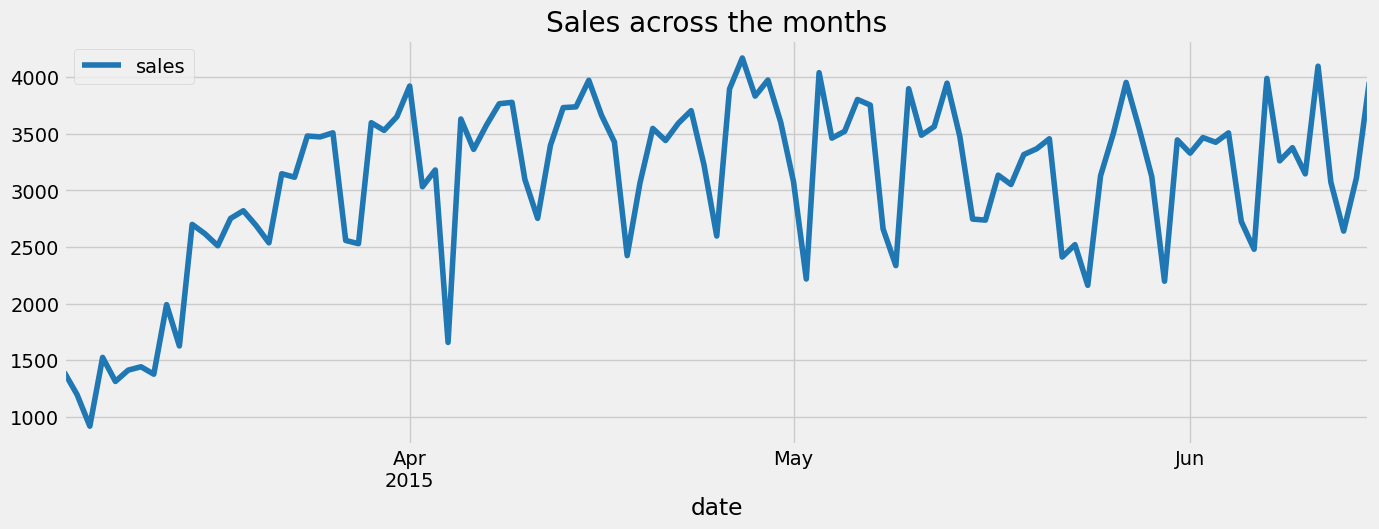

In [ ]:
df1.plot(figsize=(15, 5),
        color=color_pal[0],
        title='Sales across the months')
plt.show()

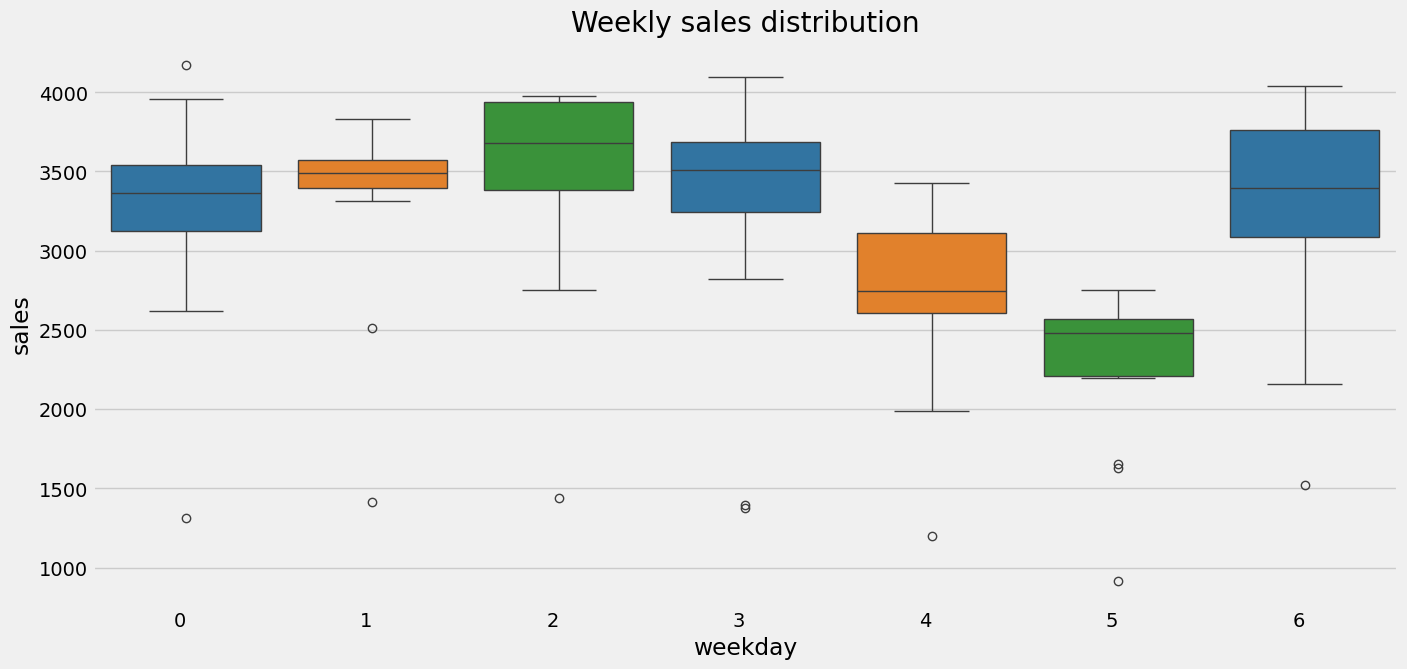

In [ ]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

plt.figure(figsize=(15, 7))
ax = sns.boxplot(x='weekday', y='sales', data=df, palette=colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
ax.set(title='Weekly sales distribution')
plt.show()

<b>Inference:</b>  The chart shows the distribution of weekly sales across different days of the week, with sales variability and outliers. Weekday 6 has the highest median sales, while weekday 5 has the lowest median sales. Weekday 0 shows moderate performance, while weekday 4 has a lower median and low outliers. Weekends (Saturday and Sunday) show significant sales trends, with Sunday having strong sales and Saturday performing poorly. This analysis will help businesses optimize inventory, staffing, and marketing strategies based on the day of the week. The graph shows that the sales gradually decrease throughout the week with a sudden spike on weekends



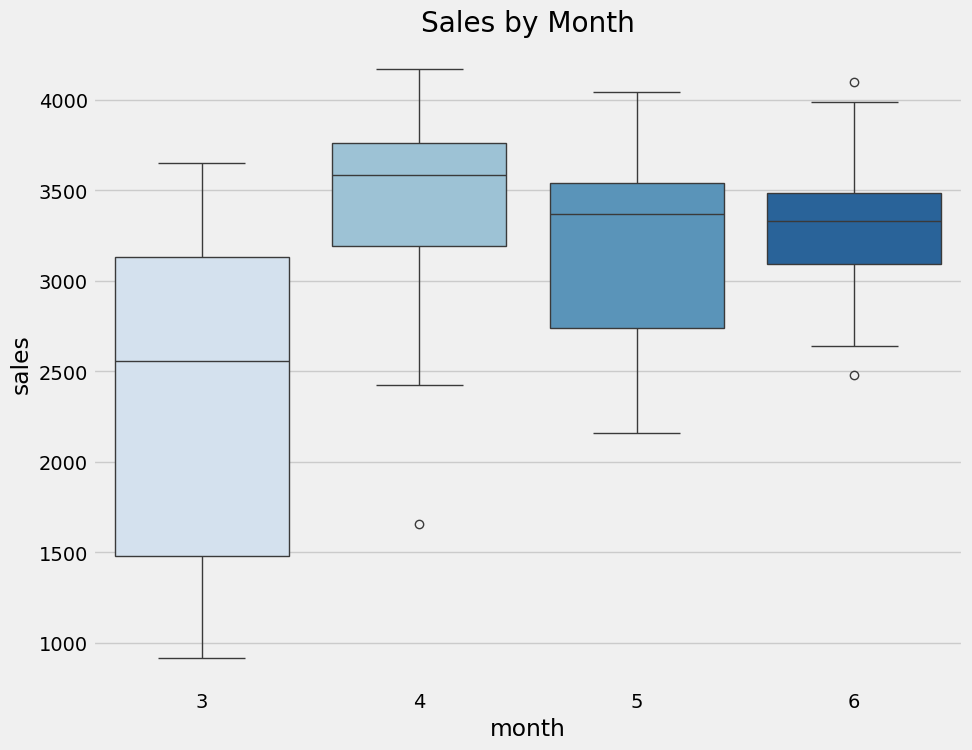

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='sales', palette='Blues')
ax.set_title('Sales by Month')
plt.show()

<b>Inference:</b> The number of sales gradually ascends in march, peaks in april , and then gradually descends in may and then dropping  in june

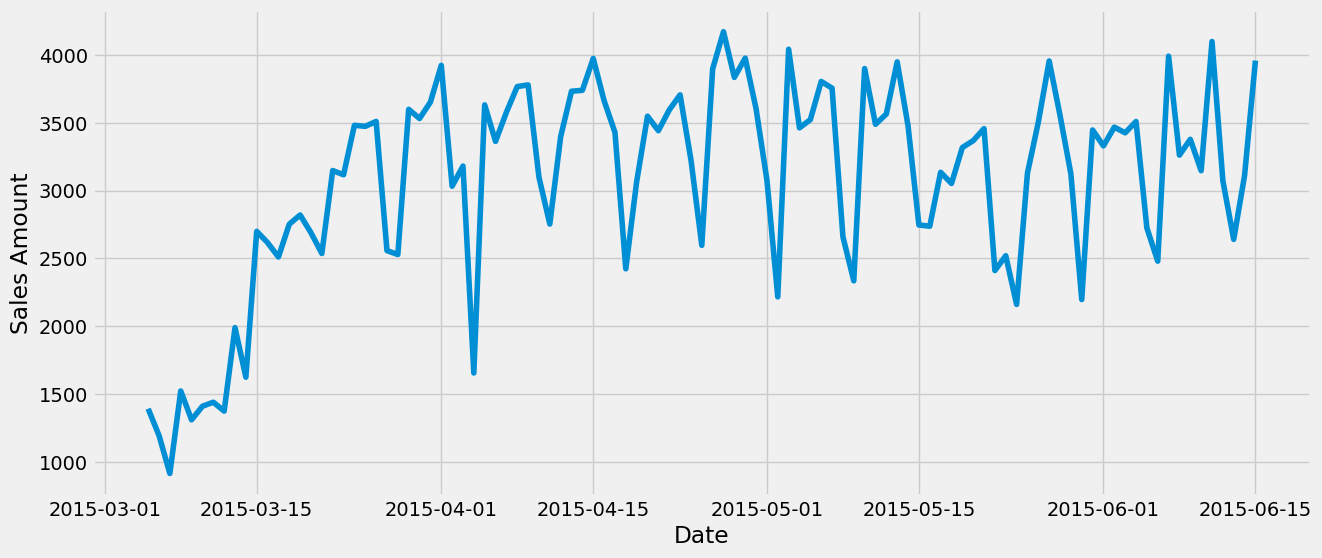

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['sales'])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

<b>Inference:</b>

The chart shows a general upward trend in sales from March to mid-June 2015, indicating growth. However, there are short-term fluctuations, with sharp increases and decreases, suggesting periodic variability. Sales peak around late April, early June, and mid-June, possibly due to higher consumer demand. The sales pattern stabilizes slightly from April, but the amplitude of these fluctuations remains significant. Understanding these patterns is crucial for future sales forecasting and inventory management.
There is a seasonal pattern sales. As also infered in the plot for sales vs. weekdays above, we can see an increase in the sales in the weekends , peaking on saturday and sunday, and then a gradual decrease till friday. This pattern is repeated each month.

In [ ]:
def prepare_data(df):
    df.index = pd.to_datetime(df.index)
    df['day_of_week'] = df.index.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([0, 6])
    df['day_name'] = df.index.day_name()
    return df

def analyze_sales(df):
    """Perform comprehensive sales analysis"""
    weekday_stats = df[~df['is_weekend']]['sales'].describe()
    weekend_stats = df[df['is_weekend']]['sales'].describe()

    print("\n=== Weekday vs Weekend Sales Analysis ===")
    print("\nWeekday Sales Statistics:")
    print(weekday_stats)
    print("\nWeekend Sales Statistics:")
    print(weekend_stats)

    daily_avg = df.groupby('day_name')['sales'].agg(['mean', 'std']).round(2)
    print("\n=== Average Daily Sales ===")
    print(daily_avg)

    print("\n=== Overall Sales Statistics ===")
    print(df['sales'].describe())

    df['sales_rolling_avg'] = df['sales'].rolling(window=7).mean()

    return df

def plot_sales_analysis(df):
    """Create visualizations for sales analysis"""
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='is_weekend', y='sales', data=df)
    plt.title('Sales Distribution: Weekday vs Weekend')
    plt.xlabel('Is Weekend')
    plt.ylabel('Sales')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='day_name', y='sales', data=df)
    plt.title('Sales Distribution by Day of Week')
    plt.xticks(rotation=45)
    plt.ylabel('Sales')

    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['sales'], label='Daily Sales', alpha=0.7)
    plt.plot(df.index, df['sales_rolling_avg'], label='7-day Rolling Average', linewidth=2)
    plt.title('Sales Time Series with Rolling Average')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
df2 = df1.copy()

df2 = prepare_data(df2)


# Additional analysis: Calculate percentage difference between weekday and weekend sales
weekday_mean = df2[~df2['is_weekend']]['sales'].mean()
weekend_mean = df2[df2['is_weekend']]['sales'].mean()
pct_difference = ((weekend_mean - weekday_mean) / weekday_mean) * 100

print(f"\n=== Sales Difference Analysis ===")
print(f"Average weekday sales: {weekday_mean:.2f}")
print(f"Average weekend sales: {weekend_mean:.2f}")
print(f"Percentage difference: {pct_difference:.2f}%")


=== Sales Difference Analysis ===
Average weekday sales: 2999.96
Average weekend sales: 3260.01
Percentage difference: 8.67%


In [ ]:
df2 = analyze_sales(df2)



=== Weekday vs Weekend Sales Analysis ===

Weekday Sales Statistics:
count      73.000000
mean     2999.962055
std       770.647790
min       916.410000
25%      2536.510000
50%      3180.180000
75%      3563.650000
max      4097.400000
Name: sales, dtype: float64

Weekend Sales Statistics:
count      30.000000
mean     3260.010333
std       668.816542
min      1311.750000
25%      3112.190000
50%      3379.535000
75%      3622.632500
max      4169.870000
Name: sales, dtype: float64

=== Average Daily Sales ===
              mean     std
day_name                  
Friday     2745.44  566.92
Monday     3270.80  659.45
Saturday   2277.59  507.03
Sunday     3249.22  701.04
Thursday   3248.17  813.40
Tuesday    3313.66  626.85
Wednesday  3467.00  687.05

=== Overall Sales Statistics ===
count     103.000000
mean     3075.704272
std       748.663271
min       916.410000
25%      2650.075000
50%      3316.490000
75%      3584.730000
max      4169.870000
Name: sales, dtype: float64


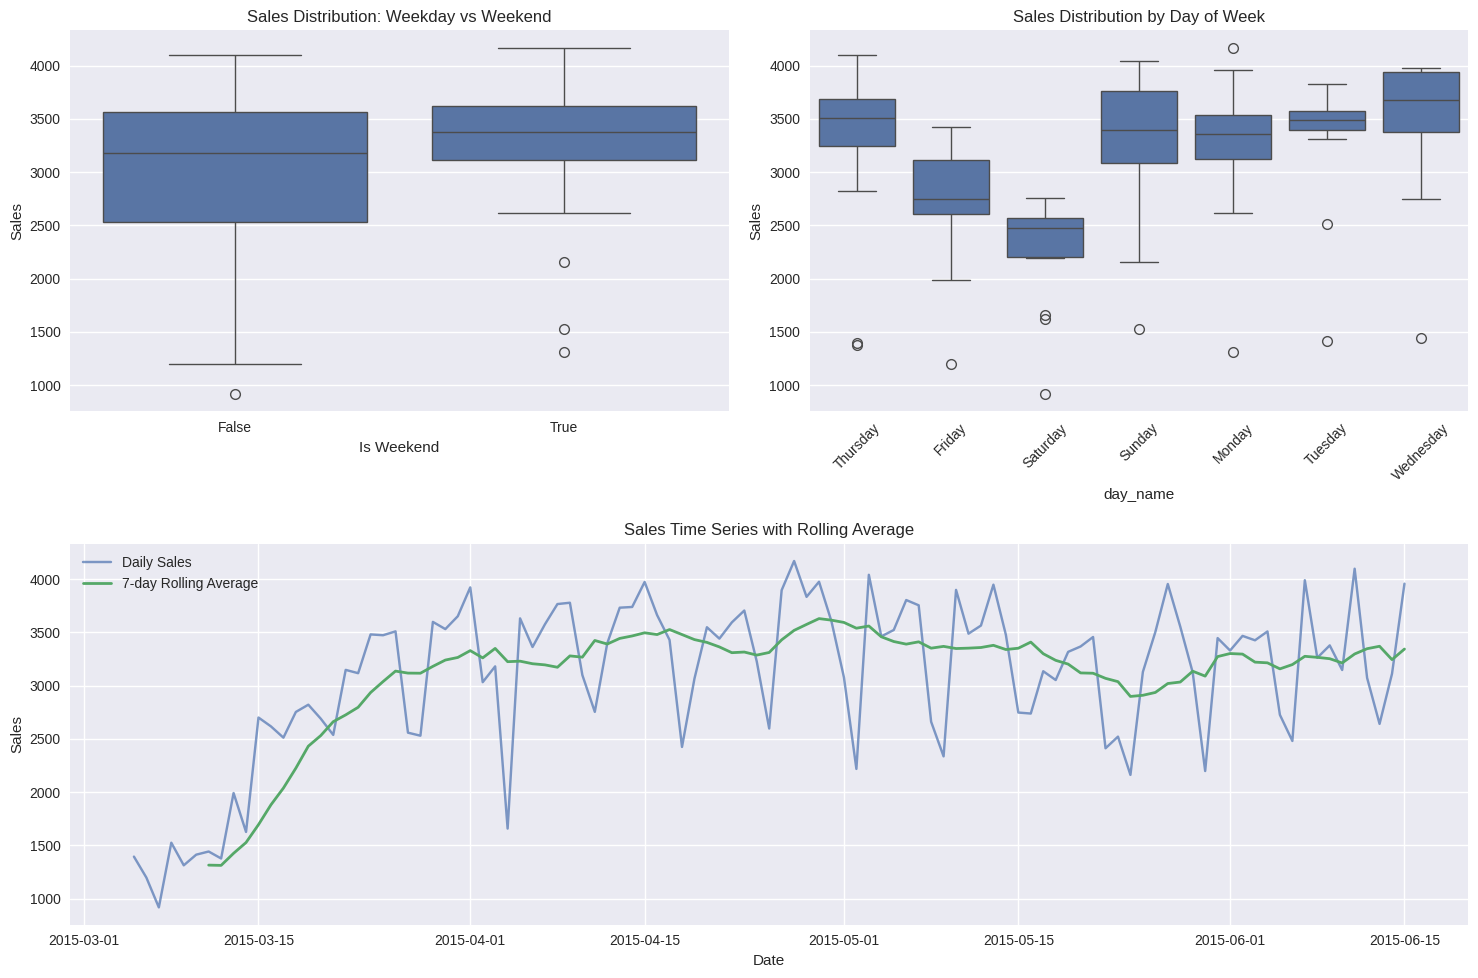

In [ ]:
plot_sales_analysis(df2)

1. Weekend sales show slightly higher median values but less variability compared to weekdays, with Wednesday consistently being the strongest performing day and Saturday showing the lowest median sales despite being a weekend day.
2. The business demonstrates a clear growth phase from early March to mid-April 2015, after which sales stabilized around the 3000-3500 range, suggesting successful business expansion followed by market saturation.
3. While daily sales fluctuate considerably (as shown by the blue line), the 7-day rolling average (green line) reveals a more stable underlying trend with occasional dips, indicating that while daily performance varies, the business maintains relatively consistent weekly performance levels.

## Train Test Split

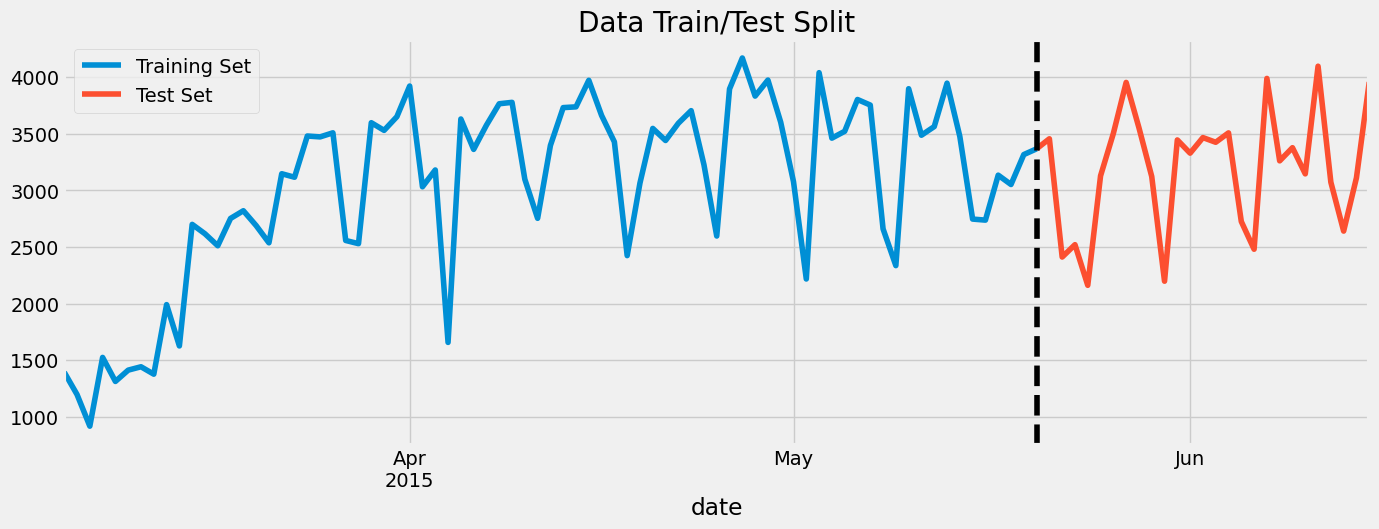

In [ ]:
# df = df1.copy()

train = df1.loc[df.index <= '20-05-2015']
test = df1.loc[df.index  >= '20-05-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('20-05-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Quantitative Methods to Forecast Product Sales

It can be fairly concluded from the data exploratory plots above that there is seasonality present in the sales data, along with a greneral increase in the number of sales over the months. Therefore, in order to forecast the number of sales for the last month of the dataset, we will keep in mind the linear trend and seasonality present in the sales. <br>
There are multiple ways to approach the forecasting problem, we can either build traditional time series models, or use causal models, such as linear regression. We will look at both these methods and try to evaluate our forecasts using the validation set.

## Model 1 : XGBOOST
XGBoost, which stands for Extreme Gradient Boosting, is a strong machine learning algorithm that is particularly good at time-series forecasting and other predictive modeling problems. The predictions of several weak models (decision trees) are combined in this ensemble learning technique to produce a powerful predictive model.

### Why We Have used XGBOOST ?

We have used XGBOOST as a base model to compare to due to the following reasons .

1. Handling Non-Linearity:
   - Sales data often exhibits complex, non-linear relationships between various factors such as historical sales, seasonality, promotions, and external market conditions and our dataset have these complexities.
   - XGBoost, as a tree-based ensemble method, is adept at capturing these non-linear patterns in the data, leading to more accurate sales forecasts compared to linear regression models.

2. Robustness to Overfitting:
   - Time-series data can be susceptible to overfitting, where the model performs well on the training data but fails to generalize to new, unseen data.
   - XGBoost employs several regularization techniques, such as L1/L2 regularization and tree-pruning, which help prevent overfitting and improve the model's ability to generalize to new data.

3. Handling Heterogeneous Features:
   - Sales forecasting often requires the use of diverse data sources, including both numerical (e.g., historical sales, prices) and categorical (e.g., product categories, marketing campaigns) features.
   - XGBoost can effectively handle this heterogeneous data, automatically learning the appropriate representations for each feature type, leading to more comprehensive and accurate sales forecasts.

4. Interpretability and Feature Importance:
   - In addition to accurate forecasts, understanding the key drivers of sales is often crucial for decision-making.
   - XGBoost provides feature importance metrics, which can help identify the most influential factors contributing to sales, enabling businesses to focus on the most relevant drivers and make more informed decisions.

5. Scalability and Efficiency:
   - Our Dataset is small in comparision to other businesses which often deal with large-scale sales data, but the ability to train and deploy models at large scale efficiently is essential.
   - XGBoost is known for its computational efficiency, allowing it to handle large datasets and train models quickly, making it a suitable choice for real-world sales forecasting applications.


The combination of XGBoost's ability to handle non-linearity, robustness to overfitting, versatility in handling heterogeneous features, and efficient scalability make it a highly suitable for our analysis.

### Model Creation XGBOOST

In [ ]:
train = feature_creation(train)
test = feature_creation(test)

FEATURES = ['year', 'month', 'day', 'weekday']
TARGET = 'sales'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:3109.14384	validation_1-rmse:3210.09736
[100]	validation_0-rmse:1239.15184	validation_1-rmse:1184.36960
[200]	validation_0-rmse:543.28137	validation_1-rmse:498.35512
[300]	validation_0-rmse:299.19044	validation_1-rmse:367.94719
[364]	validation_0-rmse:235.97143	validation_1-rmse:374.79616


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

### Feature Importance

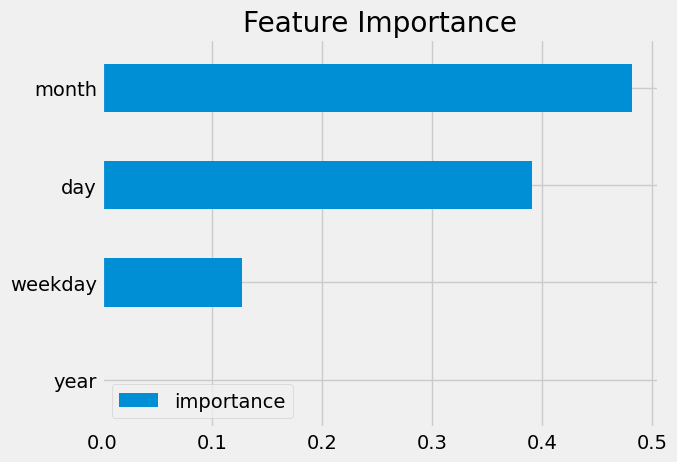

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### Forecasting

In [ ]:
test['prediction'] = reg.predict(X_test)

In [ ]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

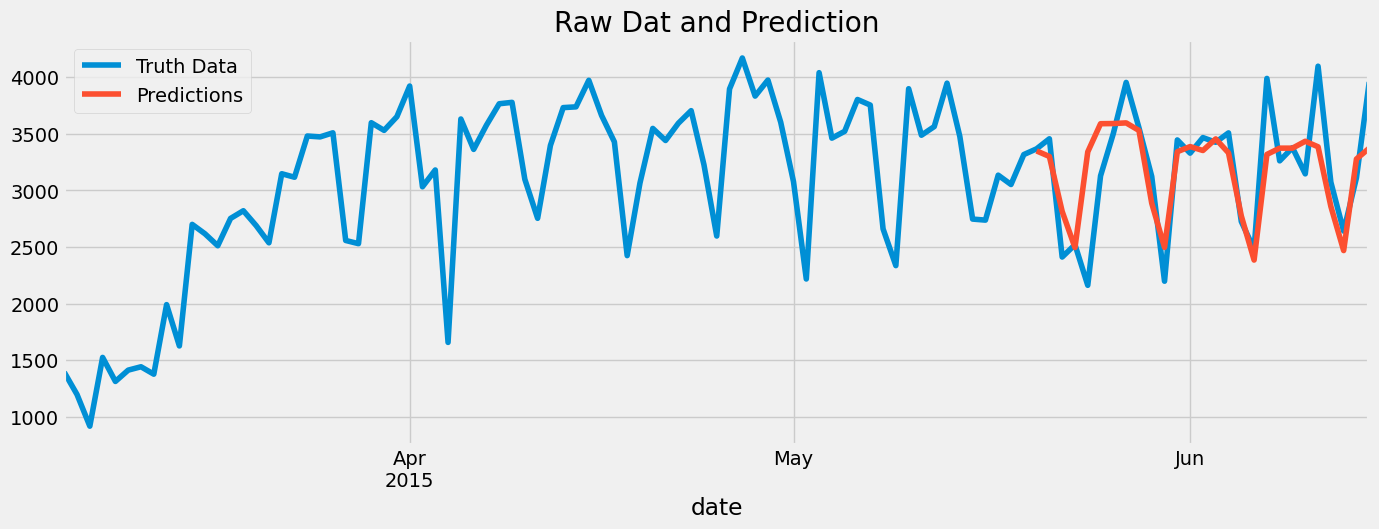

In [ ]:
ax = df[['sales']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

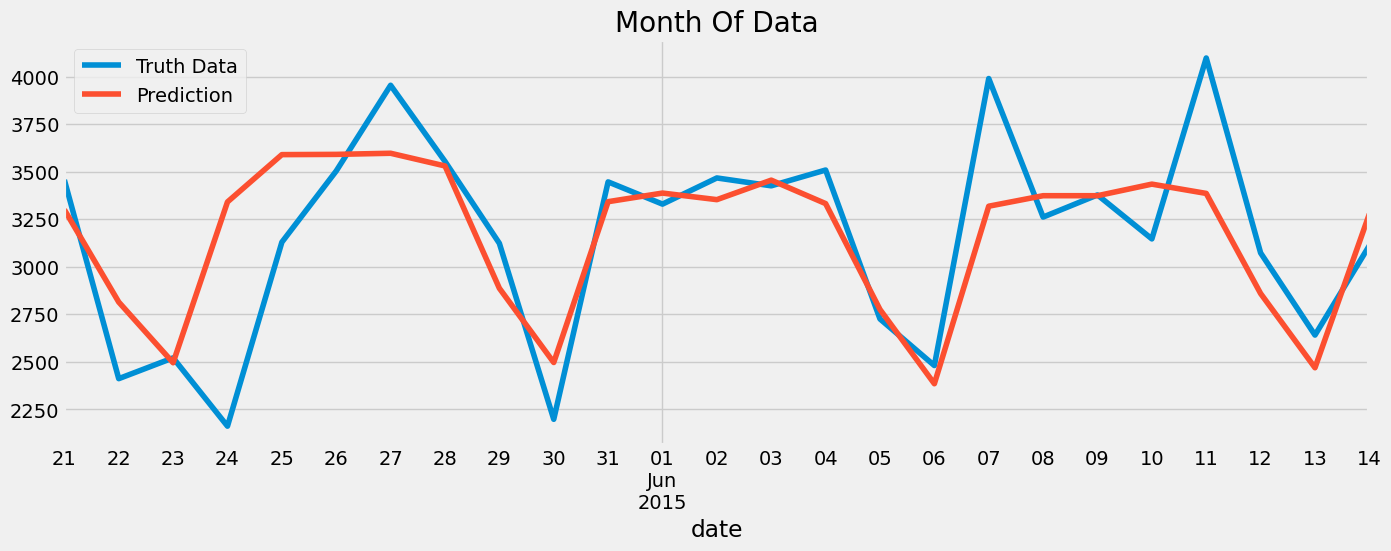

In [ ]:
ax = df.loc[(df.index > '20-05-2015') & (df.index < '15-06-2015')]['sales'] \
    .plot(figsize=(15, 5), title='Month Of Data')
df.loc[(df.index > '20-05-2015') & (df.index < '15-06-2015')]['prediction'] \
    .plot()
plt.legend(['Truth Data','Prediction'])
plt.show()

Inference: To the naked eye, the forecasts seem alright the decreasing trend is clearly captured by our XGBoost model. However, we will formally quantify the performance using forecast accuracy metrics.

## <b> Evaluating the Forecasts </b>

Forecast error is the main metric we use to assess the performance of XGBoost forecasting models. The disparity between anticipated and actual sales values is known as forecast error. For example, if the model predicts that 14 units will be sold, but only 10 were sold then the error is -4 .

We frequently utilize measures like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and a scale-independent statistic called Mean Absolute Percentage Error (MAPE) to evaluate the model's accuracy over the course of the prediction period.

+ <b>MAE:</b> The Mean Absolute Error (MAE) metric computes the absolute errors for each period, adds them up, then divides the total by the number of periods. It does this without taking direction into account. It offers a clear indicator of forecast accuracy.


+ <b>RMSE:</b> Root Mean Squared Error (RMSE): This method adds up errors similarly to MAE, but instead of taking the square root of the average, each error is squared first. bigger predicting errors are penalized more severely than smaller ones when the errors are squared, emphasizing the bigger disparities.

+ <b>MAPE:</b> The Mean Absolute Percentage Error (MAPE) is a scale-independent metric that can be used to compare forecasts on various scales, in contrast to the scale-dependent MAE and RMSE. It is perfect for cross-dataset comparison since it is computed by dividing the absolute error by actual sales, providing a percentage-based mistake that accounts for actual sales values.

### Score (RMSE)

In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])

In [ ]:
score = np.sqrt(mean_squared_error(test['sales'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 367.17


In [ ]:
mae = np.mean(np.abs(test['error']))

In [ ]:
mape = np.sum(np.abs(test['error'])) / np.sum(test['sales']) * 100


In [ ]:
# Aggregate results in a DataFrame
result_df = pd.DataFrame({
    'total_sales': [test['sales'].sum()],
    'total_pred_sales': [test['prediction'].sum()],
    'overall_error': [test['error'].sum()],
    'MAE': [mae],
    'RMSE': [score],
    'MAPE': [mape]
}, index=['XGBoost'])

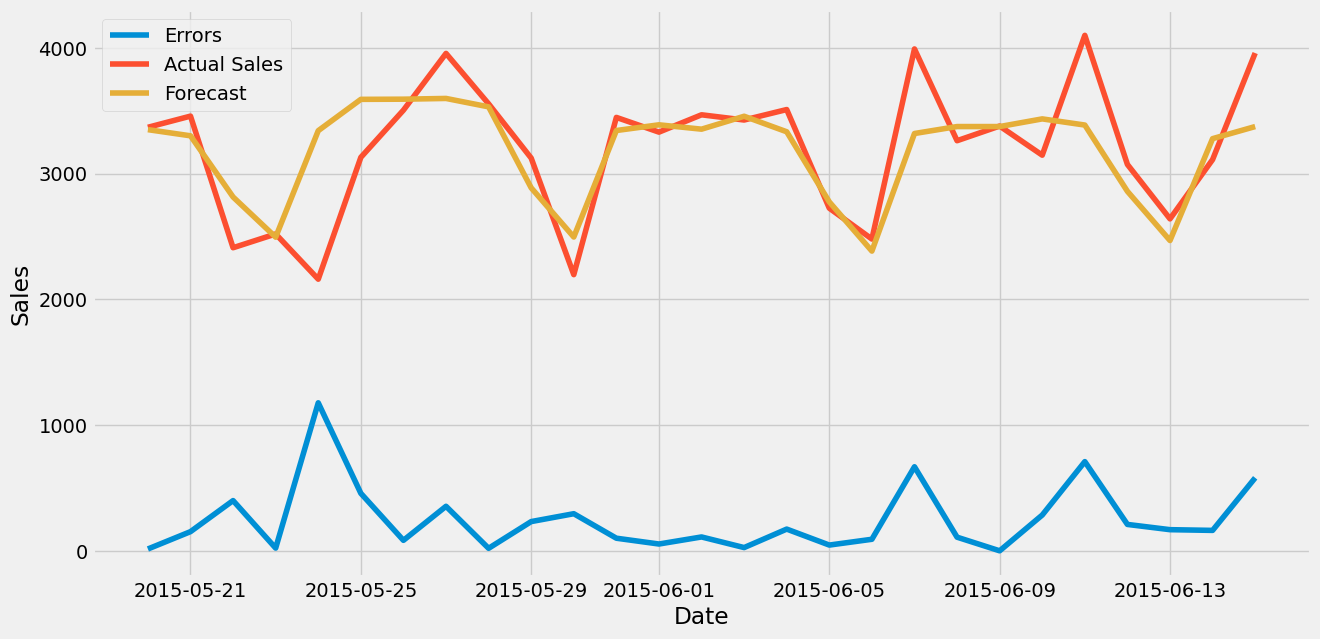

In [ ]:
# Plotting actual sales, forecast, and errors
plt.figure(figsize=(14, 7))
plt.plot(test.index, np.abs(test['error']), label='Errors')
plt.plot(test.index, test['sales'], label='Actual Sales')
plt.plot(test.index, test['prediction'], label='Forecast')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
result_df


,total_sales,total_pred_sales,overall_error,MAE,RMSE,MAPE
XGBoost,86405.13,85872.507812,6798.679932,251.80296,367.174107,7.868375


We achieved a MAPE of 7.8%, and the overall error is not as bad. This will serve as a standard by which to evaluate the other models' forecasting abilities.

 ### Worst And Best Predictions


In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])

# Worst Predicting days
test.groupby([test.index])['error'].mean().sort_values(ascending=False).head(10)

,error
date,
2015-05-24,1179.351621
2015-06-11,712.256689
2015-06-07,671.489600
2015-06-15,583.677168
2015-05-25,460.573359
2015-05-22,402.911260
2015-05-27,357.553291
2015-05-30,298.687725
2015-06-10,288.086387


In [ ]:
# Best Predicting days
test.groupby([test.index])['error'].mean().sort_values(ascending=True).head(10)

,error
date,
2015-06-09,4.087168
2015-05-20,18.566445
2015-05-28,23.919092
2015-05-23,25.611592
2015-06-03,29.792871
2015-06-05,49.691865
2015-06-01,58.076094
2015-05-26,87.282676
2015-06-06,95.699092


### Time Series Decomposition Plot

We may view a time series' trend, error/remainder terms, and seasonality using a time series decomposition plot. The Exponential Smoothing models depend heavily on these three elements. As a result, the decomposition plot will help in selecting the kind of exponential smoothing model to use to our forecasts.

<Figure size 640x480 with 0 Axes>

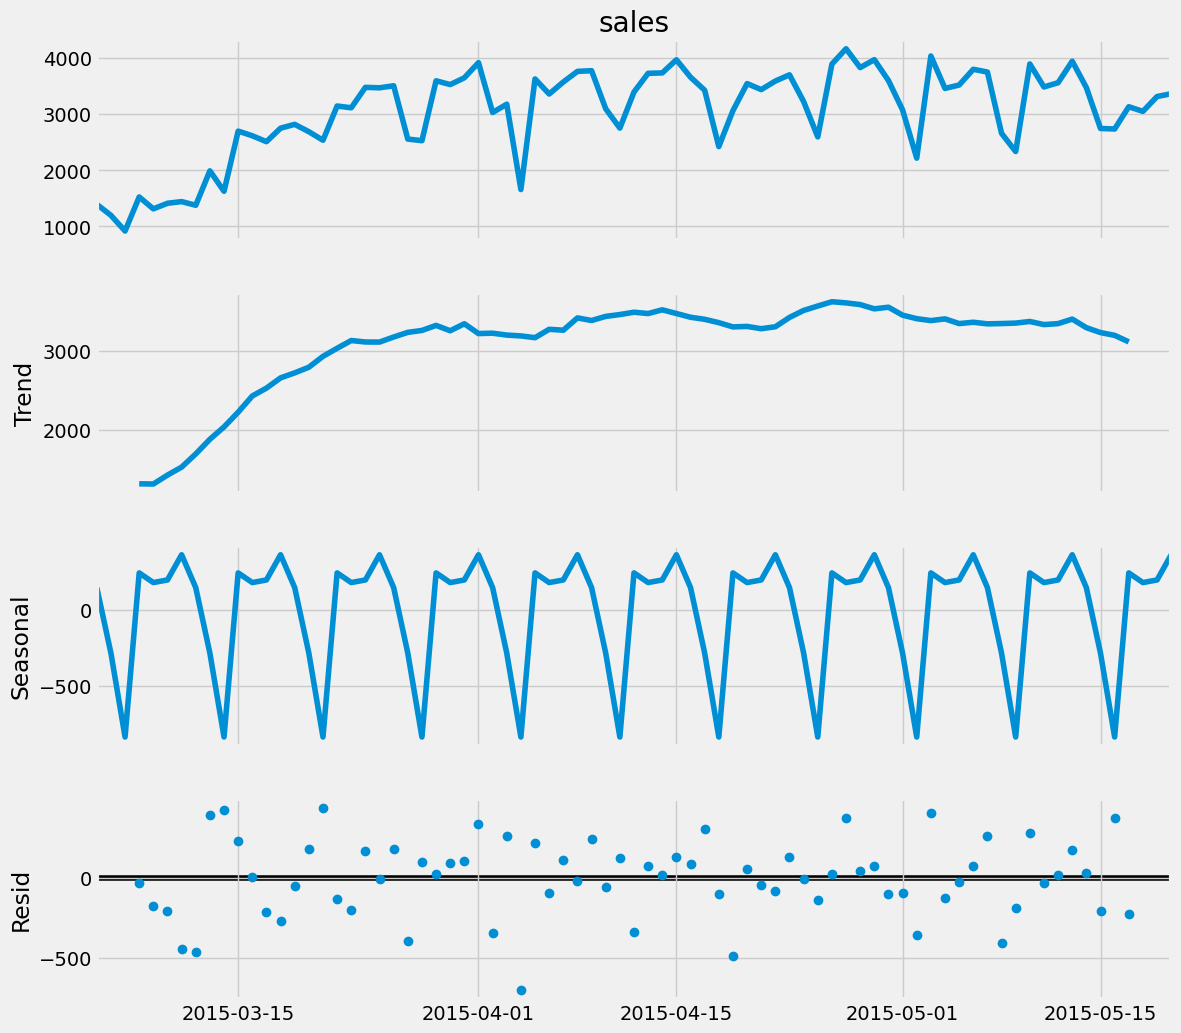

In [ ]:
result = seasonal_decompose(train['sales'], model='additive')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(14, 12)

### Determine Error, Trend and Seasonality
For our sales data, we observe a linear trend and consistent seasonal patterns over time. Given these characteristics, an additive approach is suitable for both trend and seasonality. Additionally, since the error component shows a stable variance, we will treat it additively as well.

We will utilize Exponential Smoothing, a widely-used statistical technique for time-series forecasting. This method aligns with the ETS framework, which decomposes the time series into its components—Error, Trend, and Seasonality—by applying smoothing techniques to each component.

## Testing For  Stationarity

In [ ]:
test_result=adfuller(df1['sales'])


In [ ]:
print(test_result)

(-4.671230212460381, 9.52726664627807e-05, 8, 94, {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}, 1316.3256980835702)


In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df1['sales'])


ADF Test Statistic : -4.671230212460381
p-value : 9.52726664627807e-05
#Lags Used : 8
Number of Observations Used : 94
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


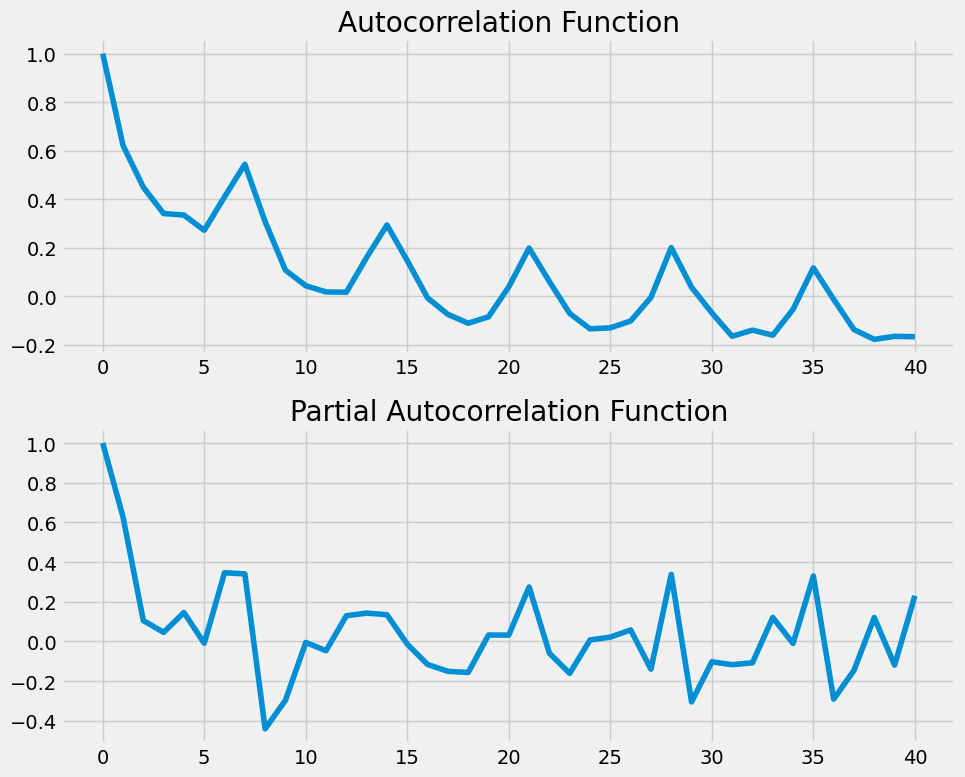

In [ ]:
# Calculating ACF and PACF
acf_values = acf(df['sales'], nlags=40)
pacf_values = pacf(df['sales'], nlags=40)

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.plot(acf_values)
ax1.set_title('Autocorrelation Function')
ax2.plot(pacf_values)
ax2.set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

1. The Autocorrelation Function (ACF) shows a strong initial correlation that quickly decays, with regular periodic spikes approximately every 7 lags, suggesting a weekly seasonal pattern in the sales data.
2. The Partial Autocorrelation Function (PACF) displays a sharp drop after lag 1, followed by a significant negative spike at lag 8, indicating that each sales value is most strongly influenced by the previous day's sales and has a negative relationship with sales from the same day last week.
3. Both ACF and PACF plots show decreasing correlation strength over time with values mostly staying within significance bounds (implied by the small oscillations around zero after initial lags), suggesting the time series could be modeled effectively with a low-order ARIMA model incorporating weekly seasonality.

## Why ARIMA and SARIMA models ?

ARIMA (Auto-Regressive Integrated Moving Average) and SARIMA (Seasonal Auto-Regressive Integrated Moving Average) models are well-suited for sales forecasting in time-series data due to their ability to capture the inherent patterns and trends present in the data.

ARIMA models are powerful for sales forecasting as they can effectively model the underlying structure of the time series data, including the autoregressive (AR) and moving average (MA) components. By identifying and accounting for the linear dependencies within the data, ARIMA models can generate accurate sales forecasts, particularly for short-term and medium-term horizons. Furthermore, the "I" (Integrated) component of ARIMA models allows them to handle non-stationary data, which is the case with our dataset as it exhibits trends and seasonality.

- ARIMA models can capture the linear relationships and autocorrelations present in sales data, allowing them to make more accurate forecasts.
- The "Integrated" component of ARIMA models enables them to handle non-stationary data.
- ARIMA models are relatively straightforward to implement and interpret, making them accessible to a wide range of users and easy to integrate into existing forecasting workflows.
- ARIMA models can be further extended to SARIMA models to account for seasonal patterns in the sales data, which is crucial for many industries with recurring seasonal trends.

These facts lead to the choice of these models for our analysis


### MODEL 2 : ARIMA MODEL BUILDING

In [ ]:
# Splitting data into train and test (last 14 days as test)
a_train = df['sales'][:-14]
a_test = df['sales'][-14:]

In [ ]:
# Fitting ARIMA model
model = ARIMA(a_train, order=(1,1,1))
results = model.fit()

# Making predictions
forecast = results.forecast(steps=len(a_test))


Model Performance Metrics:
MSE: 241150.88
RMSE: 491.07
MAE: 392.11


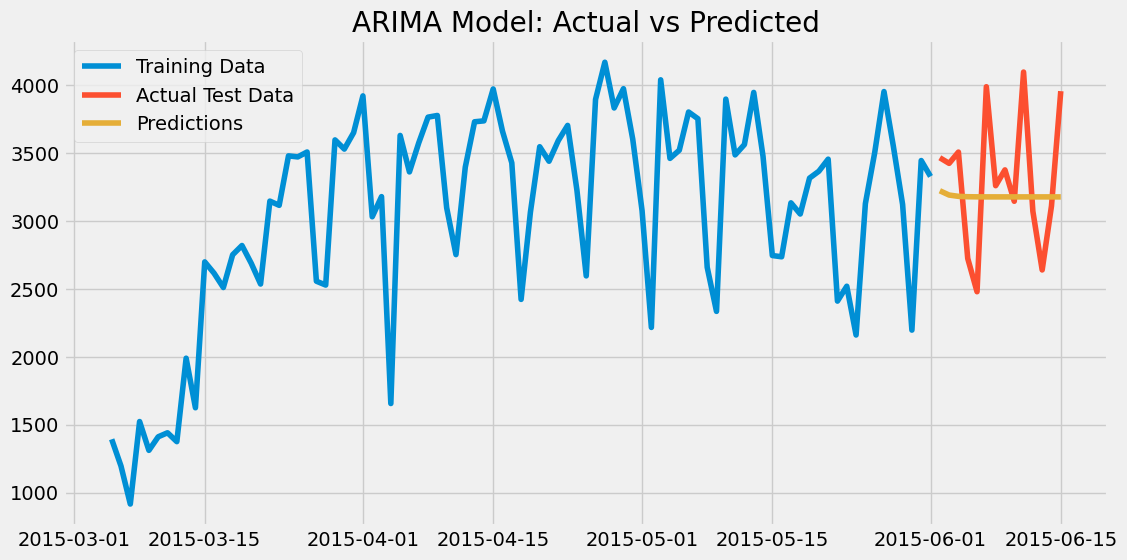

In [ ]:
# Calculating error metrics
mse = mean_squared_error(a_test, forecast)
mae = mean_absolute_error(a_test, forecast)
rmse = np.sqrt(mse)

print('\nModel Performance Metrics:')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# Plotting  results
plt.figure(figsize=(12, 6))
plt.plot(a_train.index, a_train, label='Training Data')
plt.plot(a_test.index, a_test, label='Actual Test Data')
plt.plot(a_test.index, forecast, label='Predictions')
plt.title('ARIMA Model: Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
print("\nModel Summary:")
print(results.summary())


Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -679.308
Date:                Sun, 27 Oct 2024   AIC                           1364.617
Time:                        21:28:09   BIC                           1372.049
Sample:                    03-05-2015   HQIC                          1367.611
                         - 06-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2998      0.134      2.236      0.025       0.037       0.563
ma.L1         -0.7899      0.112     -7.055      0.000      -1.009      -0.570
sigma2      2.947e+05   4.71e+04    

### MODEL 3 : SARIMA MODEL BUILDING

In [ ]:
# Splitting data into train and test (last 14 days as test)
a_train = df['sales'][:-14]
a_test = df['sales'][-14:]

In [ ]:
def find_best_sarima_params(data):
    """
    Grid search for optimal SARIMA parameters
    """
    # Defining the parameter grid
    p = d = q = range(0, 2)
    P = D = Q = range(0, 2)
    s = [7]  # Weekly seasonality

    # Creating all possible combinations
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in list(itertools.product(P, D, Q))]

    best_aic = float('inf')
    best_params = None
    best_seasonal_params = None

    print("Finding optimal parameters...")

    # Grid searching
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(data,
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
                results = model.fit(disp=False)

                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = param
                    best_seasonal_params = param_seasonal

            except Exception:
                continue

    print(f'Best SARIMA params: {best_params}')
    print(f'Best seasonal params: {best_seasonal_params}')
    print(f'Best AIC: {best_aic}')

    return best_params, best_seasonal_params

In [ ]:
best_params, best_seasonal_params = find_best_sarima_params(a_train)

Finding optimal parameters...
Best SARIMA params: (1, 1, 1)
Best seasonal params: (1, 1, 1, 7)
Best AIC: 1069.6699044365987


In [ ]:
def fit_sarima_model(data, order, seasonal_order):
    """Fit SARIMA model with given parameters"""
    model = SARIMAX(data,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    return model.fit(disp=False)

model = fit_sarima_model(a_train, best_params, best_seasonal_params)

In [ ]:
# Making predictions
forecast = model.get_forecast(len(a_test))
predictions = forecast.predicted_mean

# Calculating confidence intervals
confidence_intervals = forecast.conf_int()

mape = mean_absolute_percentage_error(a_test, predictions) * 100
rmse = np.sqrt(mean_squared_error(a_test, predictions))

print(f'\nModel Performance Metrics:')
print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')


Model Performance Metrics:
MAPE: 12.24%
RMSE: 460.83


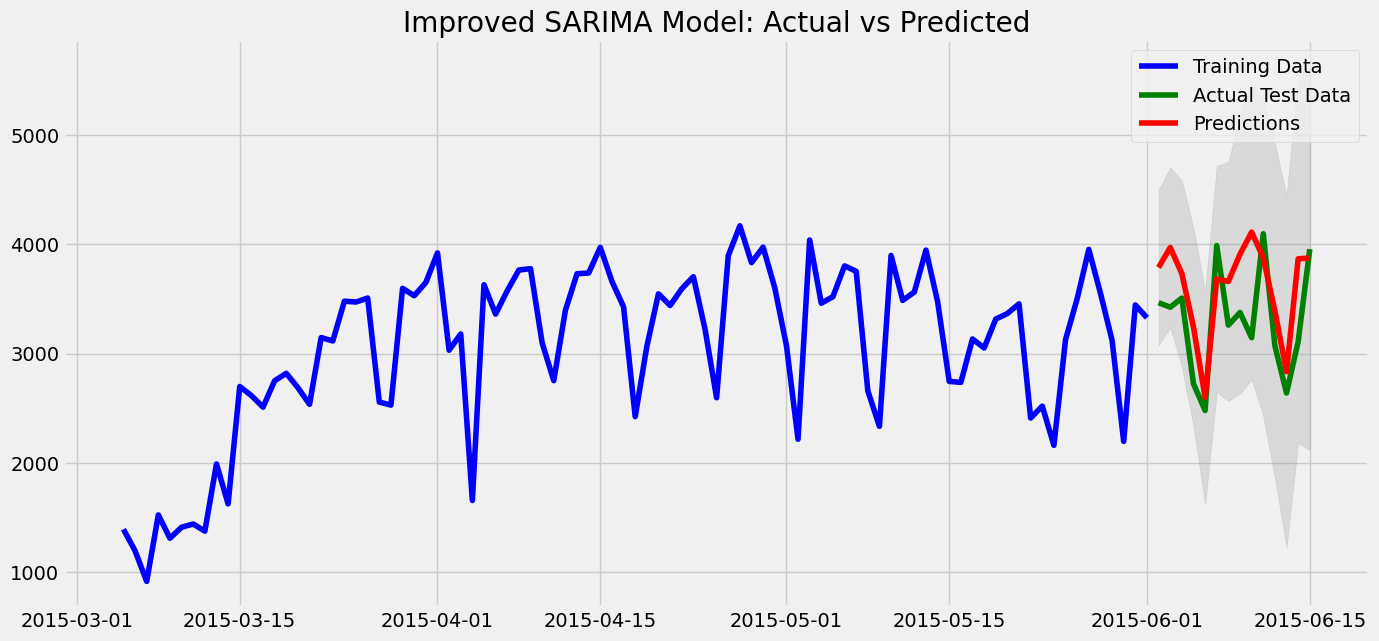

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(a_train.index, a_train, label='Training Data', color='blue')
plt.plot(a_test.index, a_test, label='Actual Test Data', color='green')
plt.plot(a_test.index, predictions, label='Predictions', color='red')
plt.fill_between(a_test.index,
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1],
                color='gray', alpha=0.2)
plt.title('Improved SARIMA Model: Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
print("\nModel Summary:")
print(model.summary())



Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                   89
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -529.835
Date:                           Sun, 27 Oct 2024   AIC                           1069.670
Time:                                   21:29:26   BIC                           1081.053
Sample:                               03-05-2015   HQIC                          1074.202
                                    - 06-01-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4701      0.141     -3.325      0.001      -0.747      -0.193
ma.L1         -0.2749      

## Why LSTM ?

LSTM (Long Short-Term Memory) models, a type of Recurrent Neural Network (RNN), have proven to be highly effective for sales forecasting in time-series data. LSTM models are designed to capture long-term dependencies and complex non-linear relationships within the data, which is particularly valuable for sales forecasting. Unlike traditional time-series models, LSTM models can learn from past sales data and incorporate relevant external factors, such as economic indicators, marketing campaigns, and competitor activities, to generate more accurate and robust sales forecasts.



## MODEL 4 : LSTM MODEL BUILDING

### MODEL 1

In [ ]:
df = df1.copy()

In [ ]:
## Preparing data

# Extract sales data and convert to numpy array
sales_data = df['sales'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(sales_data)

# Create sequences
X, y = [], []
for i in range(len(sales_scaled) - 7):
    X.append(sales_scaled[i:(i + 7)])
    y.append(sales_scaled[i + 7])

X, y = np.array(X), np.array(y)


# Splitting into train and test sets
train_size = int(len(X) * (1 - 0.2))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
## Model Building

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(7, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

## training

history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - loss: 0.4972 - val_loss: 0.3733
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4594 - val_loss: 0.3337
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4124 - val_loss: 0.2892
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3776 - val_loss: 0.2364
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2930 - val_loss: 0.1755
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2340 - val_loss: 0.1096
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1600 - val_loss: 0.0503
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0814 - val_loss: 0.0229
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0310 - val_loss: 0.0460
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0443 - val_loss: 0.0646
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0452 - val_loss: 0.0457
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0348 - val_l

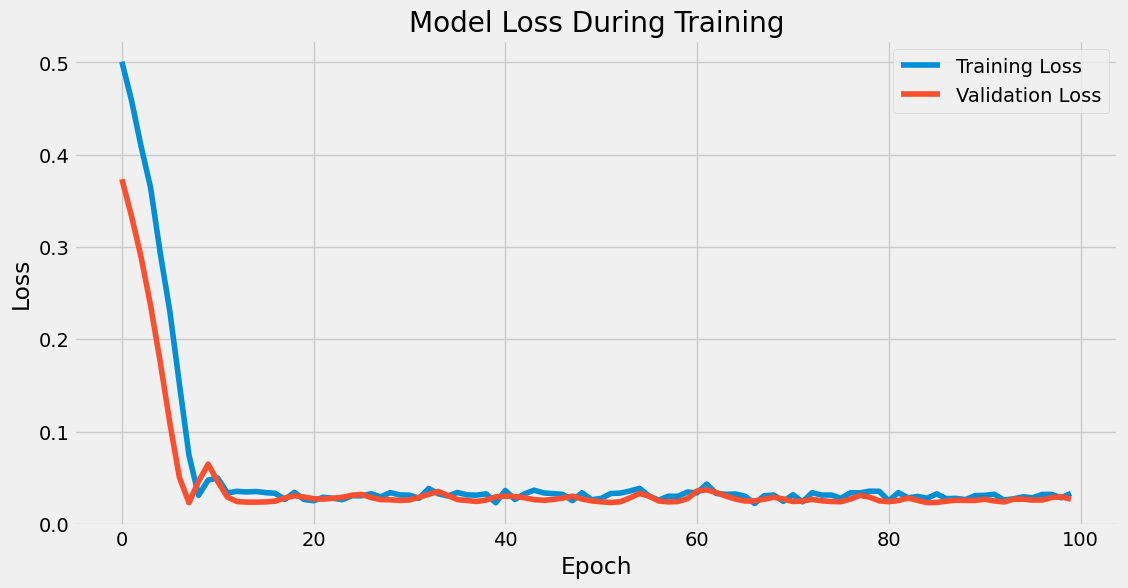

In [ ]:
#Plotting the training history

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Making predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform predictions
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
df['sales'] = df['sales'].astype(float)

def predict_future(model, df, scaler, n_future=30, seq_length=7):
    """Predict future values"""
    last_sequence = df['sales'].values[-seq_length:]
    last_sequence = scaler.transform(last_sequence.reshape(-1, 1))

    future_predictions = []
    current_sequence = last_sequence.reshape(1, seq_length, 1)

    for _ in range(n_future):
        next_pred = model.predict(current_sequence)
        future_predictions.append(next_pred[0])

        current_sequence = np.roll(current_sequence, -1, axis=1)
        current_sequence[0, -1, 0] = next_pred[0]

    future_predictions = np.array(future_predictions)
    future_predictions = scaler.inverse_transform(future_predictions)

    return future_predictions

future_predictions = predict_future(model, df, scaler, n_future=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

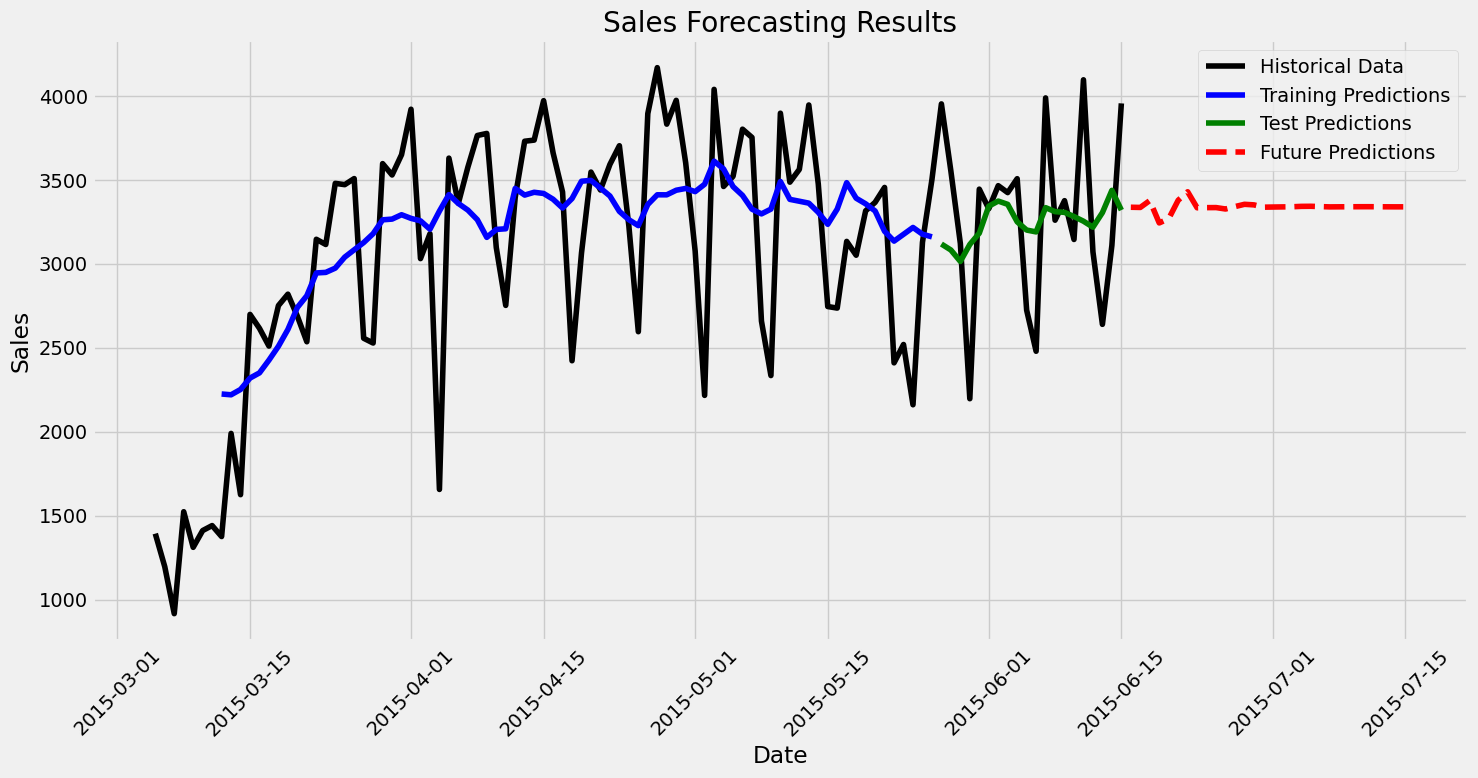

In [ ]:
plt.figure(figsize=(15, 8))

# Plotting historical data
plt.plot(df.index, df['sales'], label='Historical Data', color='black')

# Plotting training predictions
train_idx = df.index[7:len(train_pred)+7]
plt.plot(train_idx, train_pred, label='Training Predictions', color='blue')

# Plotting test predictions
test_idx = df.index[len(train_pred)+7:]
plt.plot(test_idx, test_pred, label='Test Predictions', color='green')

# Plotting future predictions
future_idx = pd.date_range(start=df.index[-1], periods=len(future_predictions)+1)[1:]
plt.plot(future_idx, future_predictions, label='Future Predictions', color='red', linestyle='--')

plt.title('Sales Forecasting Results')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## Metrics Calculations
def calculate_metrics(y_true, y_pred):
    """
    Calculate MAE, MAPE, and RMSE
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

# Calculate metrics for training set
train_true = df['sales'].values[7:len(train_pred)+7]
train_metrics = calculate_metrics(train_true, train_pred.flatten())

# Calculate metrics for test set
test_true = df['sales'].values[len(train_pred)+7:]
test_metrics = calculate_metrics(test_true, test_pred.flatten())

print("\nTraining Set Metrics:")
print(f"MAE: {train_metrics['MAE']:.2f}")
print(f"RMSE: {train_metrics['RMSE']:.2f}")
print(f"MAPE: {train_metrics['MAPE']:.2f}%")

print("\nTest Set Metrics:")
print(f"MAE: {test_metrics['MAE']:.2f}")
print(f"RMSE: {test_metrics['RMSE']:.2f}")
print(f"MAPE: {test_metrics['MAPE']:.2f}%")


Training Set Metrics:
MAE: 389.79
RMSE: 493.08
MAPE: 14.22%

Test Set Metrics:
MAE: 387.38
RMSE: 489.77
MAPE: 12.37%


### MODEL 2

In [ ]:
df1.head()

,sales
date,
2015-03-05,1393.34
2015-03-06,1196.23
2015-03-07,916.41
2015-03-08,1524.00
2015-03-09,1311.75


In [ ]:
## Data Preparation

df_features = df1.copy()

# Time-based features
df_features['dayofweek'] = pd.to_datetime(df.index).dayofweek
df_features['month'] = pd.to_datetime(df.index).month
df_features['day'] = pd.to_datetime(df.index).day

# More sophisticated lag features
for i in [1, 2, 3, 7, 14]:
    df_features[f'lag_{i}'] = df_features['sales'].shift(i)

# Different window size rolling statistics
for window in [3, 7, 14, 30]:
    df_features[f'rolling_mean_{window}'] = df_features['sales'].rolling(window=window).mean()
    df_features[f'rolling_std_{window}'] = df_features['sales'].rolling(window=window).std()
    df_features[f'rolling_min_{window}'] = df_features['sales'].rolling(window=window).min()
    df_features[f'rolling_max_{window}'] = df_features['sales'].rolling(window=window).max()

# Add rate of change features
df_features['sales_diff'] = df_features['sales'].diff()
df_features['sales_pct_change'] = df_features['sales'].pct_change()

# Add weekend indicator
df_features['is_weekend'] = (df_features['dayofweek'] >= 5).astype(int)

# Fill NaN values using forward fill then backward fill
df_features = df_features.fillna(method='ffill').fillna(method='bfill')


feature_columns = df_features.select_dtypes(include=[np.number]).columns

# Use RobustScaler instead of MinMaxScaler to handle outliers better
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_features[feature_columns])
scaled_df = pd.DataFrame(scaled_data, columns=feature_columns, index=df_features.index)

X, y = [], []
for i in range(len(scaled_df) - 14):
    X.append(scaled_data[i:(i + 14)])
    y.append(scaled_data[i + 14, 0])

X, y = np.array(X), np.array(y)

# Use more recent data for test set
train_size = int(len(X) * (1 - 0.2))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

df_features.head()


,sales,dayofweek,month,day,lag_1,lag_2,lag_3,lag_7,lag_14,rolling_mean_3,...,rolling_std_14,rolling_min_14,rolling_max_14,rolling_mean_30,rolling_std_30,rolling_min_30,rolling_max_30,sales_diff,sales_pct_change,is_weekend
date,,,,,,,,,,,,,,,,,,,,,
2015-03-05,1393.34,3,3,5,1393.34,1393.34,1393.34,1393.34,1393.34,1168.660000,...,621.747303,916.41,2752.18,2517.869667,885.224461,916.41,3922.07,-197.11,-0.141466,0
2015-03-06,1196.23,4,3,6,1393.34,1393.34,1393.34,1393.34,1393.34,1168.660000,...,621.747303,916.41,2752.18,2517.869667,885.224461,916.41,3922.07,-197.11,-0.141466,0
2015-03-07,916.41,5,3,7,1196.23,1393.34,1393.34,1393.34,1393.34,1168.660000,...,621.747303,916.41,2752.18,2517.869667,885.224461,916.41,3922.07,-279.82,-0.233918,1
2015-03-08,1524.00,6,3,8,916.41,1196.23,1393.34,1393.34,1393.34,1212.213333,...,621.747303,916.41,2752.18,2517.869667,885.224461,916.41,3922.07,607.59,0.663011,1
2015-03-09,1311.75,0,3,9,1524.00,916.41,1196.23,1393.34,1393.34,1250.720000,...,621.747303,916.41,2752.18,2517.869667,885.224461,916.41,3922.07,-212.25,-0.139272,0


In [ ]:
## Model building

model = Sequential([
        # First Bidirectional LSTM layer
        Bidirectional(LSTM(128, activation='tanh', return_sequences=True,
                          kernel_regularizer=L1L2(l1=1e-5, l2=1e-5)),
                     input_shape=(14, X_train.shape[2])),
        BatchNormalization(),
        Dropout(0.4),

        # Second Bidirectional LSTM layer
        Bidirectional(LSTM(96, activation='tanh', return_sequences=True,
                          kernel_regularizer=L1L2(l1=1e-5, l2=1e-5))),
        BatchNormalization(),
        Dropout(0.4),

        # Third Bidirectional LSTM layer
        Bidirectional(LSTM(64, activation='tanh',
                          kernel_regularizer=L1L2(l1=1e-5, l2=1e-5))),
        BatchNormalization(),
        Dropout(0.4),

        # Dense layers for final predictions
        Dense(32, activation='relu', kernel_regularizer=L1L2(l1=1e-5, l2=1e-5)),
        BatchNormalization(),
        Dense(1, activation='linear')
    ])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=50,
            restore_best_weights=True,
            mode='min'
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=20,
            min_lr=0.00001
        )
    ]

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1,
    shuffle=False  # Important for time series
)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 2.7029 - val_loss: 0.4686 - learning_rate: 0.0010
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 3.9754 - val_loss: 0.4589 - learning_rate: 0.0010
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 1.7028 - val_loss: 0.4633 - learning_rate: 0.0010
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 1.9466 - val_loss: 0.4616 - learning_rate: 0.0010
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1.3843 - val_loss: 0.4596 - learning_rate: 0.0010
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 1.8152 - val_loss: 0.4564 - learning_rate: 0.0010
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 1.1899 - val_loss: 0.4502 - learning_rate: 0.0010
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.2739 - val_loss: 0.4473 - learning_rate: 0.0010
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 1.4823 - val_loss: 0.4461 - learning_rate: 0.0010
Epoch 10/300
2/2 ━━━━

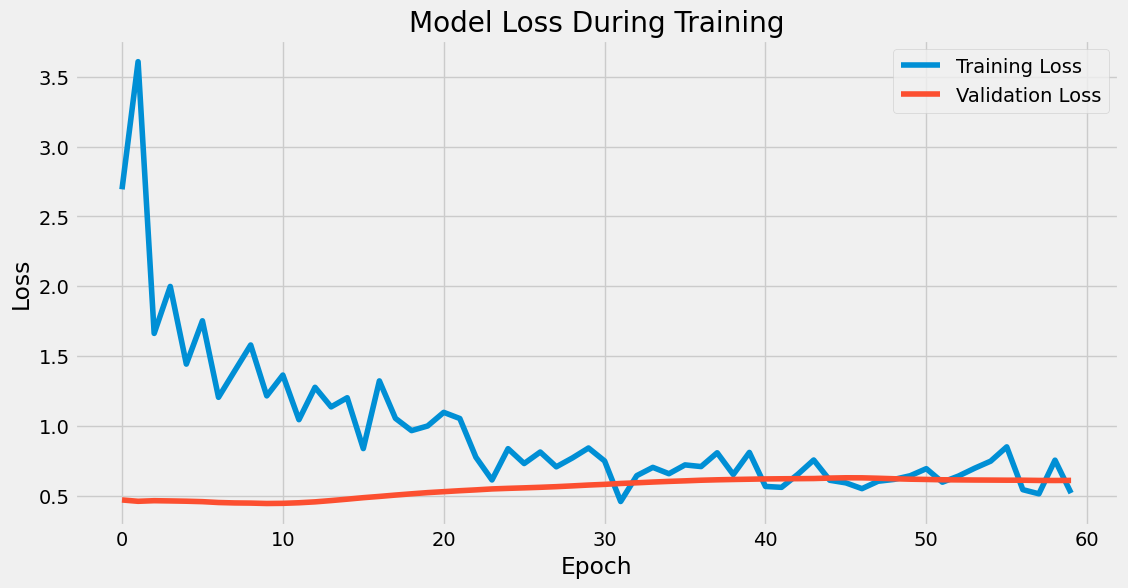

In [ ]:
#Plotting the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
 # Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform predictions
train_pred_full = np.zeros((len(train_pred), len(feature_columns)))
test_pred_full = np.zeros((len(test_pred), len(feature_columns)))

sales_idx = feature_columns.get_loc('sales')
train_pred_full[:, sales_idx] = train_pred.flatten()
test_pred_full[:, sales_idx] = test_pred.flatten()

train_pred = scaler.inverse_transform(train_pred_full)[:, sales_idx]
test_pred = scaler.inverse_transform(test_pred_full)[:, sales_idx]


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
def generate_future_predictions(model, df_features, scaler, feature_columns, seq_length=14, n_future=30):
    """
    Generate future predictions using the trained model
    """
    # Get the last sequence from the data
    last_sequence = df_features.tail(seq_length)

    # Generate predictions for future dates
    future_predictions = []
    current_sequence = df_features.tail(seq_length).select_dtypes(include=[np.number]).values
    current_sequence = scaler.transform(current_sequence)

    for _ in range(n_future):
        # Reshape the sequence for prediction
        current_sequence_reshaped = current_sequence[-seq_length:].reshape(1, seq_length, len(feature_columns))

        # Make prediction
        next_pred = model.predict(current_sequence_reshaped, verbose=0)

        # Create a dummy row for the next time step
        next_sequence = np.zeros((1, len(feature_columns)))
        sales_idx = 0
        next_sequence[0, sales_idx] = next_pred[0, 0]

        # Update the sequence
        current_sequence = np.vstack([current_sequence, next_sequence])

    # Inverse transform the predictions
    future_pred_full = np.zeros((n_future, len(feature_columns)))
    future_pred_full[:, 0] = current_sequence[-n_future:, 0]
    future_predictions = scaler.inverse_transform(future_pred_full)[:,0]

    return future_predictions

future_predictions =  generate_future_predictions(model, df_features, scaler, feature_columns, seq_length=14, n_future=30)

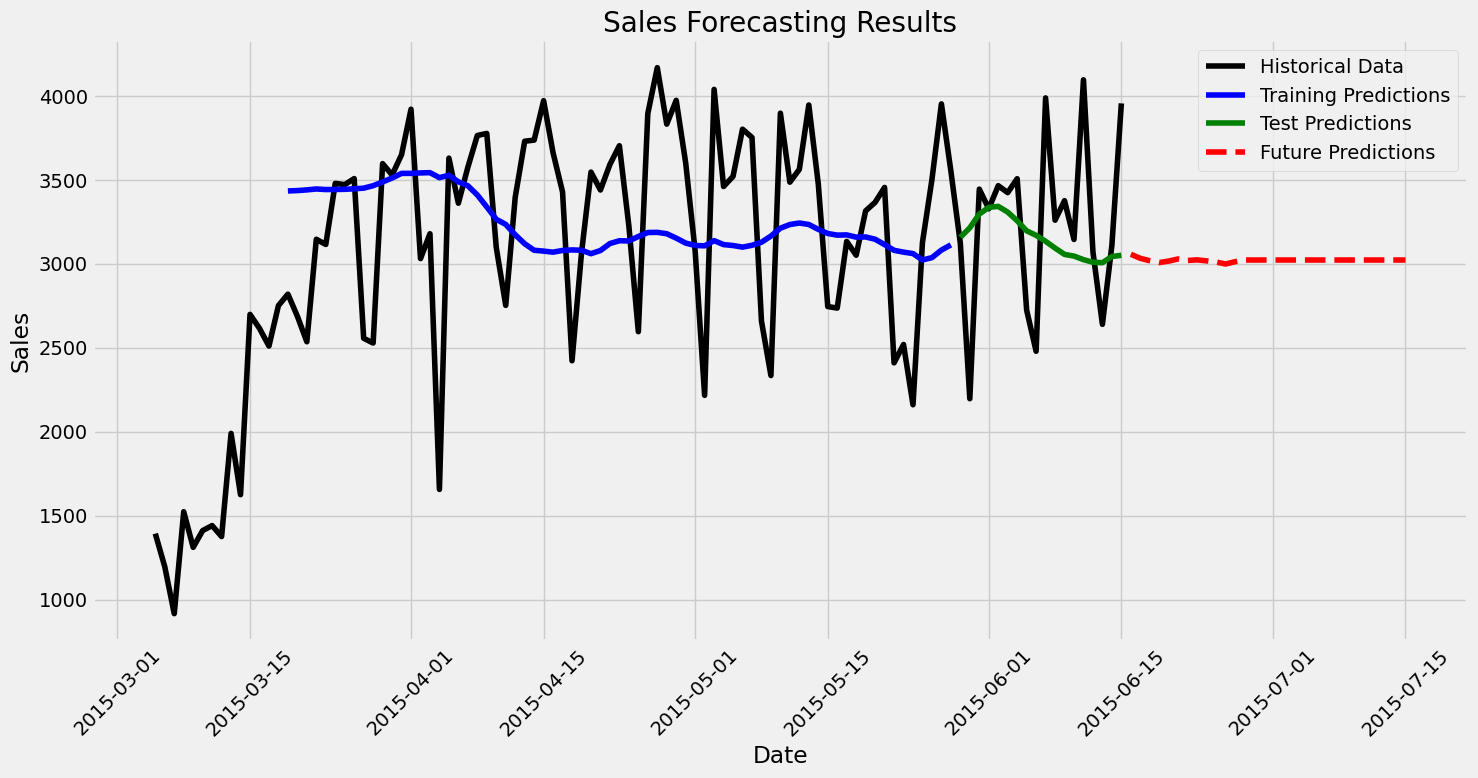

In [ ]:
def plot_predictions(df, train_pred, test_pred, future_predictions, seq_length):
    plt.figure(figsize=(15, 8))

    # Plotting historical data
    plt.plot(df.index, df['sales'], label='Historical Data', color='black')

    # Plotting training predictions
    train_idx = df.index[seq_length:len(train_pred)+seq_length]
    plt.plot(train_idx, train_pred, label='Training Predictions', color='blue')

    # Plotting test predictions
    test_idx = df.index[len(train_pred)+seq_length:]
    plt.plot(test_idx, test_pred, label='Test Predictions', color='green')

    # Plotting future predictions
    future_idx = pd.date_range(start=df.index[-1], periods=len(future_predictions)+1)[1:]
    plt.plot(future_idx, future_predictions, label='Future Predictions', color='red', linestyle='--')

    plt.title('Sales Forecasting Results')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_predictions(df_features, train_pred, test_pred, future_predictions, 14)

In [ ]:
## Metrics Calculations
def calculate_metrics(y_true, y_pred):
    """
    Calculate MAE, MAPE, and RMSE
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

# Calculate metrics for training set
train_true = df['sales'].values[14:len(train_pred)+14]
train_metrics = calculate_metrics(train_true, train_pred.flatten())

# Calculate metrics for test set
test_true = df['sales'].values[len(train_pred)+14:]
test_metrics = calculate_metrics(test_true, test_pred.flatten())

print("\nTraining Set Metrics:")
print(f"MAE: {train_metrics['MAE']:.2f}")
print(f"RMSE: {train_metrics['RMSE']:.2f}")
print(f"MAPE: {train_metrics['MAPE']:.2f}%")

print("\nTest Set Metrics:")
print(f"MAE: {test_metrics['MAE']:.2f}")
print(f"RMSE: {test_metrics['RMSE']:.2f}")
print(f"MAPE: {test_metrics['MAPE']:.2f}%")


Training Set Metrics:
MAE: 470.12
RMSE: 570.68
MAPE: 15.66%

Test Set Metrics:
MAE: 376.50
RMSE: 518.18
MAPE: 12.09%


### MODEL 3

In [ ]:
df1.head()

,sales
date,
2015-03-05,1393.34
2015-03-06,1196.23
2015-03-07,916.41
2015-03-08,1524.00
2015-03-09,1311.75


In [ ]:
## Data Preparation

df_features = df1.copy()

# Time-based features with cyclical encoding
df_features['dayofweek'] = pd.to_datetime(df.index).dayofweek
df_features['month'] = pd.to_datetime(df.index).month
df_features['day'] = pd.to_datetime(df.index).day

# Cyclical encoding of time features
df_features['dayofweek_sin'] = np.sin(2 * np.pi * df_features['dayofweek']/7)
df_features['dayofweek_cos'] = np.cos(2 * np.pi * df_features['dayofweek']/7)
df_features['month_sin'] = np.sin(2 * np.pi * df_features['month']/12)
df_features['month_cos'] = np.cos(2 * np.pi * df_features['month']/12)

# Lag features with more recent focus
for i in [1, 2, 3, 5, 7]:
  df_features[f'lag_{i}'] = df_features['sales'].shift(i)

# Rolling statistics with shorter windows to capture recent patterns
for window in [3, 5, 7, 14]:
  df_features[f'rolling_mean_{window}'] = df_features['sales'].rolling(window=window).mean()
  df_features[f'rolling_std_{window}'] = df_features['sales'].rolling(window=window).std()

# Momentum indicators
df_features['momentum_1'] = df_features['sales'].diff(1)
df_features['momentum_3'] = df_features['sales'].diff(3)
df_features['momentum_7'] = df_features['sales'].diff(7)

# Volatility feature
df_features['volatility'] = df_features['sales'].rolling(window=7).std() / df_features['sales'].rolling(window=7).mean()

# Extended weekend features
df_features['is_weekend'] = (df_features['dayofweek'] >= 5).astype(int)
df_features['is_friday'] = (df_features['dayofweek'] == 4).astype(int)

# Fill NaN values using linear interpolation first, then forward fill for any remaining
df_features = df_features.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

feature_columns = df_features.select_dtypes(include=[np.number]).columns

# Scale features independently
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_features[feature_columns])
scaled_df = pd.DataFrame(scaled_data, columns=feature_columns, index=df_features.index)

X, y = [], []
for i in range(len(scaled_df) - 14):
    X.append(scaled_data[i:(i + 14)])
    y.append(scaled_data[i + 14, df_features.columns.get_loc('sales')])

X, y = np.array(X), np.array(y)

# Split keeping temporal order
train_size = int(len(X) * (1 - 0.2))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

df_features.head()

,sales,dayofweek,month,day,dayofweek_sin,dayofweek_cos,month_sin,month_cos,lag_1,lag_2,...,rolling_mean_7,rolling_std_7,rolling_mean_14,rolling_std_14,momentum_1,momentum_3,momentum_7,volatility,is_weekend,is_friday
date,,,,,,,,,,,,,,,,,,,,,
2015-03-05,1393.34,3,3,5,0.433884,-0.900969,1.0,6.123234e-17,1393.34,1393.34,...,1313.531429,203.34574,1768.954286,621.747303,-197.11,130.66,-17.47,0.154808,0,0
2015-03-06,1196.23,4,3,6,-0.433884,-0.900969,1.0,6.123234e-17,1393.34,1393.34,...,1313.531429,203.34574,1768.954286,621.747303,-197.11,130.66,-17.47,0.154808,0,1
2015-03-07,916.41,5,3,7,-0.974928,-0.222521,1.0,6.123234e-17,1196.23,1393.34,...,1313.531429,203.34574,1768.954286,621.747303,-279.82,130.66,-17.47,0.154808,1,0
2015-03-08,1524.00,6,3,8,-0.781831,0.623490,1.0,6.123234e-17,916.41,1196.23,...,1313.531429,203.34574,1768.954286,621.747303,607.59,130.66,-17.47,0.154808,1,0
2015-03-09,1311.75,0,3,9,0.000000,1.000000,1.0,6.123234e-17,1524.00,916.41,...,1313.531429,203.34574,1768.954286,621.747303,-212.25,115.52,-17.47,0.154808,0,0


In [ ]:
model = Sequential([
      # First layer: Bidirectional LSTM
      Bidirectional(LSTM(64, activation='tanh', return_sequences=True,
                        kernel_regularizer=L1L2(l1=1e-6, l2=1e-6)),
                    input_shape=(7, X_train.shape[2])),
      BatchNormalization(),
      Dropout(0.2),

      # Second layer: GRU for better short-term memory
      GRU(48, activation='tanh', return_sequences=True,
          kernel_regularizer=L1L2(l1=1e-6, l2=1e-6),
          recurrent_dropout=0.1),
      BatchNormalization(),
      Dropout(0.2),

      # Third layer: Final LSTM
      LSTM(32, activation='tanh',
            kernel_regularizer=L1L2(l1=1e-6, l2=1e-6),
            recurrent_dropout=0.1),
      BatchNormalization(),
      Dropout(0.2),

      # Dense layers with decreasing size
      Dense(16, activation='relu', kernel_regularizer=L1L2(l1=1e-6, l2=1e-6)),
      BatchNormalization(),
      Dense(1, activation='linear')
  ])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='huber')  # Huber loss for robustness

callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=35,
            restore_best_weights=True,
            mode='min'
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=20,
            min_lr=0.00001,
            verbose=1
        )
    ]

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1,
    shuffle=False
)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 572ms/step - loss: 0.6127 - val_loss: 0.1463 - learning_rate: 0.0010
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.8770 - val_loss: 0.1450 - learning_rate: 0.0010
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6681 - val_loss: 0.1500 - learning_rate: 0.0010
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5628 - val_loss: 0.1507 - learning_rate: 0.0010
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6229 - val_loss: 0.1454 - learning_rate: 0.0010
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3782 - val_loss: 0.1426 - learning_rate: 0.0010
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3992 - val_loss: 0.1413 - learning_rate: 0.0010
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3403 - val_loss: 0.1412 - learning_rate: 0.0010
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3638 - val_loss: 0.1420 - learning_rate: 0.0010
Epoch 10/150
4/4 ━━━━━━━━━

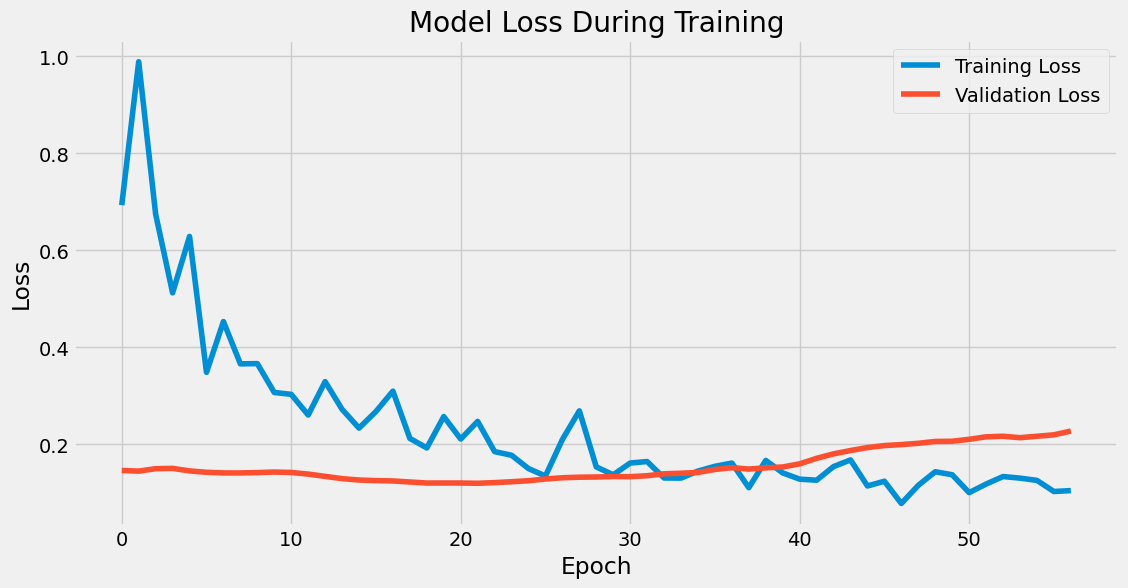

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform predictions
train_pred_full = np.zeros((len(train_pred), len(feature_columns)))
test_pred_full = np.zeros((len(test_pred), len(feature_columns)))

sales_idx = feature_columns.get_loc('sales')
train_pred_full[:, sales_idx] = train_pred.flatten()
test_pred_full[:, sales_idx] = test_pred.flatten()

train_pred = scaler.inverse_transform(train_pred_full)[:, sales_idx]
test_pred = scaler.inverse_transform(test_pred_full)[:, sales_idx]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
def generate_future_predictions(model, df_features, scaler, feature_columns, seq_length=14, n_future=30):
    """
    Generate future predictions using the trained model
    """
    # Get the last sequence from the data
    last_sequence = df_features.tail(seq_length)

    # Generate predictions for future dates
    future_predictions = []
    current_sequence = df_features.tail(seq_length).select_dtypes(include=[np.number]).values
    current_sequence = scaler.transform(current_sequence)

    for _ in range(n_future):
        # Reshape the sequence for prediction
        current_sequence_reshaped = current_sequence[-seq_length:].reshape(1, seq_length, len(feature_columns))

        # Make prediction
        next_pred = model.predict(current_sequence_reshaped, verbose=0)

        # Create a dummy row for the next time step
        next_sequence = np.zeros((1, len(feature_columns)))
        sales_idx = 0
        next_sequence[0, sales_idx] = next_pred[0, 0]

        # Update the sequence
        current_sequence = np.vstack([current_sequence, next_sequence])

    # Inverse transform the predictions
    future_pred_full = np.zeros((n_future, len(feature_columns)))
    future_pred_full[:, 0] = current_sequence[-n_future:, 0]
    future_predictions = scaler.inverse_transform(future_pred_full)[:,0]

    return future_predictions

future_predictions =  generate_future_predictions(model, df_features, scaler, feature_columns, seq_length=14, n_future=30)

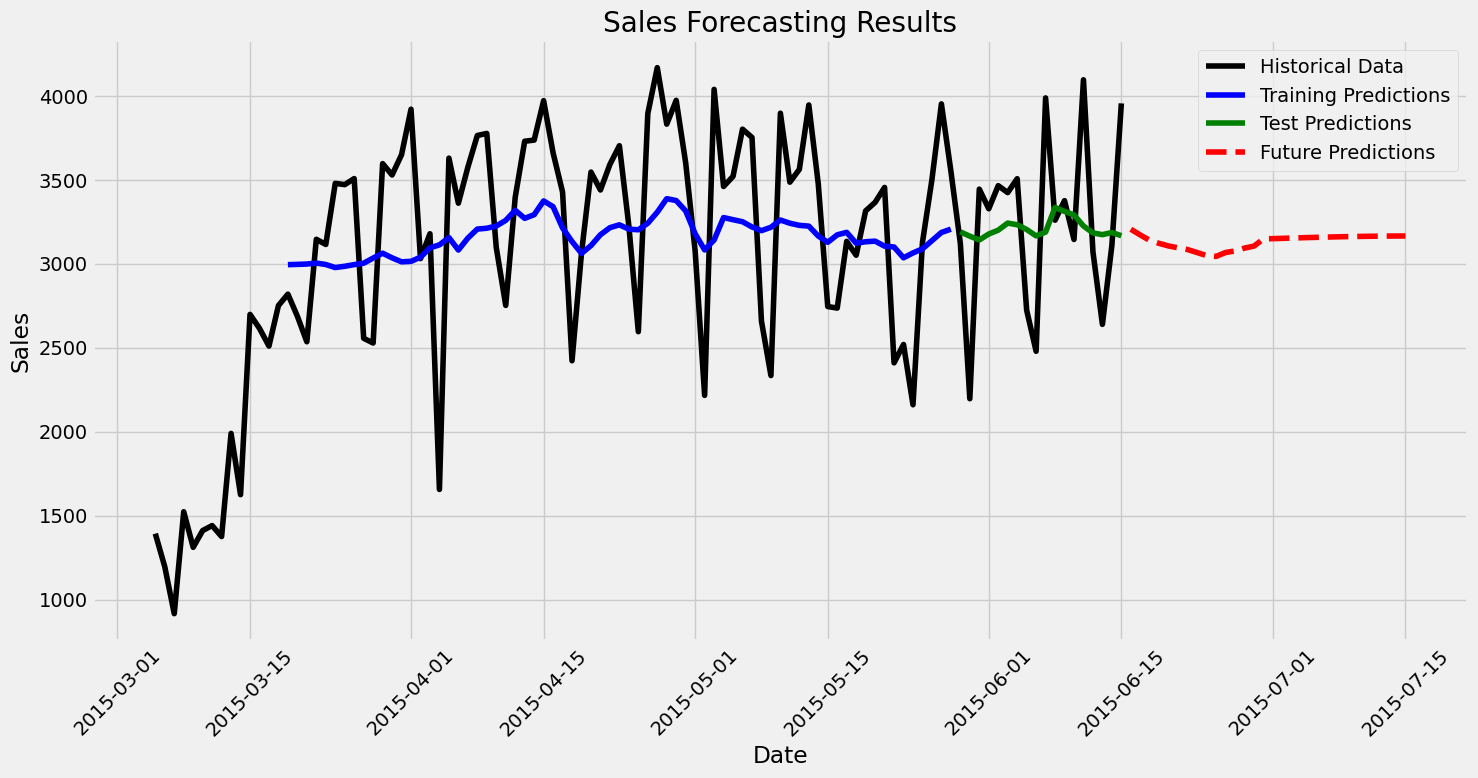

In [ ]:
def plot_predictions(df, train_pred, test_pred, future_predictions, seq_length):
    plt.figure(figsize=(15, 8))

    # Plotting historical data
    plt.plot(df.index, df['sales'], label='Historical Data', color='black')

    # Plotting training predictions
    train_idx = df.index[seq_length:len(train_pred)+seq_length]
    plt.plot(train_idx, train_pred, label='Training Predictions', color='blue')

    # Plotting test predictions
    test_idx = df.index[len(train_pred)+seq_length:]
    plt.plot(test_idx, test_pred, label='Test Predictions', color='green')

    # Plotting future predictions
    future_idx = pd.date_range(start=df.index[-1], periods=len(future_predictions)+1)[1:]
    plt.plot(future_idx, future_predictions, label='Future Predictions', color='red', linestyle='--')

    plt.title('Sales Forecasting Results')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_predictions(df_features, train_pred, test_pred, future_predictions, 14)

In [ ]:
## Metrics Calculations
def calculate_metrics(y_true, y_pred):
    """
    Calculate MAE, MAPE, and RMSE
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

# Calculate metrics for training set
train_true = df['sales'].values[14:len(train_pred)+14]
train_metrics = calculate_metrics(train_true, train_pred.flatten())

# Calculate metrics for test set
test_true = df['sales'].values[len(train_pred)+14:]
test_metrics = calculate_metrics(test_true, test_pred.flatten())

print("\nTraining Set Metrics:")
print(f"MAE: {train_metrics['MAE']:.2f}")
print(f"RMSE: {train_metrics['RMSE']:.2f}")
print(f"MAPE: {train_metrics['MAPE']:.2f}%")

print("\nTest Set Metrics:")
print(f"MAE: {test_metrics['MAE']:.2f}")
print(f"RMSE: {test_metrics['RMSE']:.2f}")
print(f"MAPE: {test_metrics['MAPE']:.2f}%")


Training Set Metrics:
MAE: 436.11
RMSE: 511.25
MAPE: 14.20%

Test Set Metrics:
MAE: 380.48
RMSE: 488.42
MAPE: 12.34%


### MODEL 4

In [ ]:
df1.head() # Ensuring df1 only have sales column

,sales
date,
2015-03-05,1393.34
2015-03-06,1196.23
2015-03-07,916.41
2015-03-08,1524.00
2015-03-09,1311.75


In [ ]:
## Preparing the Data

df_features = df1.copy()

df_features['weekday'] = pd.to_datetime(df.index).dayofweek

# Add month
df_features['month'] = pd.to_datetime(df.index).month
# Add lag features
df_features['lag_1'] = df_features['sales'].shift(1)
df_features['lag_7'] = df_features['sales'].shift(7)

# Add rolling means
df_features['rolling_mean_7'] = df_features['sales'].rolling(window=7).mean()
df_features['rolling_mean_30'] = df_features['sales'].rolling(window=30).mean()

# Add rolling std
df_features['rolling_std_7'] = df_features['sales'].rolling(window=7).std()

# Fill NaN values
df_features = df_features.fillna(method='bfill')

# Select features for model
feature_columns = ['sales', 'weekday', 'month', 'lag_1', 'lag_7',
                  'rolling_mean_7', 'rolling_mean_30', 'rolling_std_7']

# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features[feature_columns])

# Create sequences
X, y = [], []
for i in range(len(scaled_data) - 14):
    X.append(scaled_data[i:(i + 14)])
    y.append(scaled_data[i + 14, 0])  # 0 index for sales column

X, y = np.array(X), np.array(y)

# Split into train and test sets
train_size = int(len(X) * (1 - 0.2))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

df_features.head()


,sales,weekday,month,lag_1,lag_7,rolling_mean_7,rolling_mean_30,rolling_std_7
date,,,,,,,,
2015-03-05,1393.34,3,3,1393.34,1393.34,1313.531429,2517.869667,203.34574
2015-03-06,1196.23,4,3,1393.34,1393.34,1313.531429,2517.869667,203.34574
2015-03-07,916.41,5,3,1196.23,1393.34,1313.531429,2517.869667,203.34574
2015-03-08,1524.00,6,3,916.41,1393.34,1313.531429,2517.869667,203.34574
2015-03-09,1311.75,0,3,1524.00,1393.34,1313.531429,2517.869667,203.34574


In [ ]:
## MODEL BUILDING

model = Sequential([
        # First LSTM layer with increased units
        LSTM(100, activation='tanh', return_sequences=True,
             input_shape=(14, X_train.shape[2])),
        BatchNormalization(),
        Dropout(0.3),

        # Second LSTM layer
        LSTM(80, activation='tanh', return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),

        # Third LSTM layer
        LSTM(50, activation='tanh'),
        BatchNormalization(),
        Dropout(0.3),

        # Dense layers
        Dense(30, activation='relu'),
        BatchNormalization(),
        Dense(1)
    ])

# Use a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='huber')  # Huber loss is more robust to outliers


# Add callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=30,
        restore_best_weights=True,
        mode='min'
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=0.00001
    )
]

# Train model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 667ms/step - loss: 0.7038 - val_loss: 0.2525 - learning_rate: 5.0000e-04
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5862 - val_loss: 0.2391 - learning_rate: 5.0000e-04
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.6063 - val_loss: 0.2270 - learning_rate: 5.0000e-04
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.5083 - val_loss: 0.2224 - learning_rate: 5.0000e-04
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.5120 - val_loss: 0.2156 - learning_rate: 5.0000e-04
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.4984 - val_loss: 0.2118 - learning_rate: 5.0000e-04
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.4373 - val_loss: 0.2072 - learning_rate: 5.0000e-04
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.4781 - val_loss: 0.1983 - learning_rate: 5.0000e-04
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.4396 - val_loss: 0.1903 - learning_rate: 5

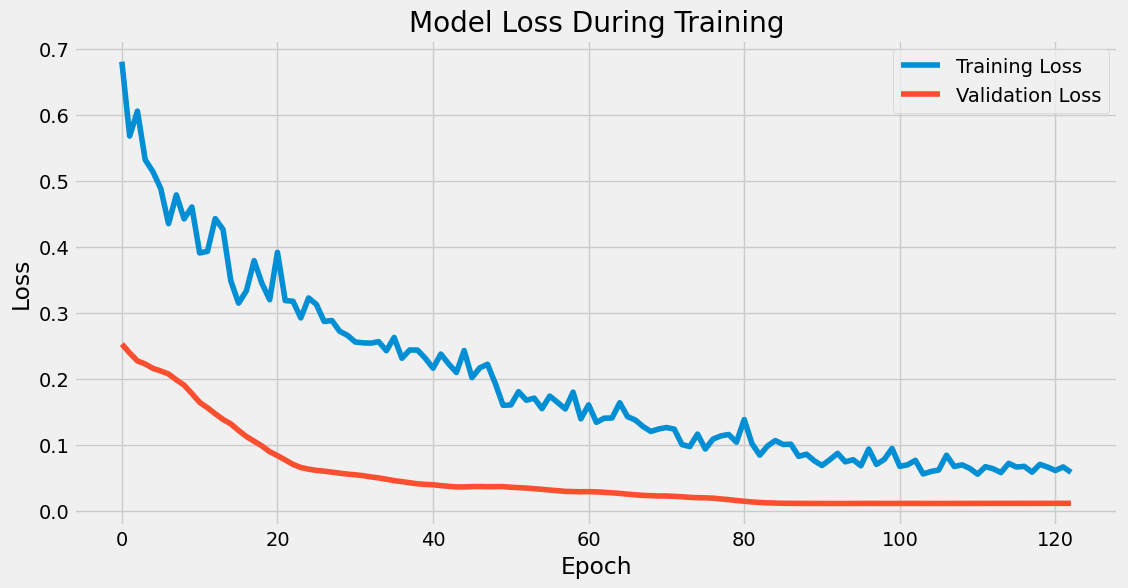

In [ ]:
#Plotting the training history

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform predictions
# Create dummy array with same shape as feature set
train_pred_reshaped = np.zeros((len(train_pred), scaler.n_features_in_))
train_pred_reshaped[:, 0] = train_pred.flatten()
train_pred = scaler.inverse_transform(train_pred_reshaped)[:, 0]

test_pred_reshaped = np.zeros((len(test_pred), scaler.n_features_in_))
test_pred_reshaped[:, 0] = test_pred.flatten()
test_pred = scaler.inverse_transform(test_pred_reshaped)[:, 0]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
def generate_future_predictions(model, df_features, scaler, feature_columns, seq_length=14, n_future=30):
    """
    Generate future predictions using the trained model
    """
    # Get the last sequence from the data
    last_sequence = df_features.tail(seq_length)

    # Generate predictions for future dates
    future_predictions = []
    current_sequence = df_features.tail(seq_length).select_dtypes(include=[np.number]).values
    current_sequence = scaler.transform(current_sequence)

    for _ in range(n_future):
        # Reshape the sequence for prediction
        current_sequence_reshaped = current_sequence[-seq_length:].reshape(1, seq_length, len(feature_columns))

        # Make prediction
        next_pred = model.predict(current_sequence_reshaped, verbose=0)

        # Create a dummy row for the next time step
        next_sequence = np.zeros((1, len(feature_columns)))
        sales_idx = 0
        next_sequence[0, sales_idx] = next_pred[0, 0]

        # Update the sequence
        current_sequence = np.vstack([current_sequence, next_sequence])

    # Inverse transform the predictions
    future_pred_full = np.zeros((n_future, len(feature_columns)))
    future_pred_full[:, 0] = current_sequence[-n_future:, 0]
    future_predictions = scaler.inverse_transform(future_pred_full)[:,0]

    return future_predictions

future_predictions =  generate_future_predictions(model, df_features, scaler, feature_columns, seq_length=14, n_future=30)



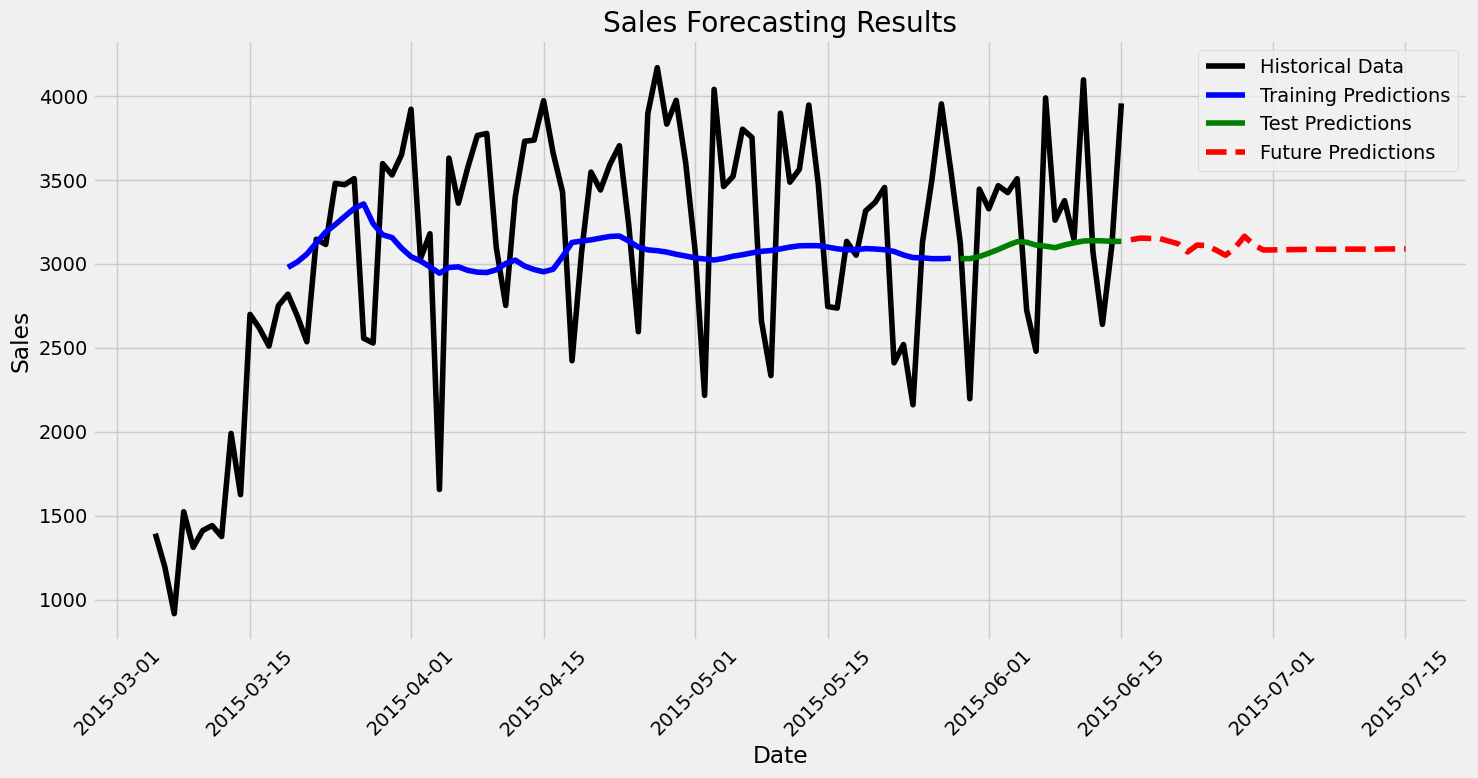

In [ ]:
def plot_predictions(df, train_pred, test_pred, future_predictions, seq_length):
    plt.figure(figsize=(15, 8))

    # Plotting historical data
    plt.plot(df.index, df['sales'], label='Historical Data', color='black')

    # Plotting training predictions
    train_idx = df.index[seq_length:len(train_pred)+seq_length]
    plt.plot(train_idx, train_pred, label='Training Predictions', color='blue')

    # Plotting test predictions
    test_idx = df.index[len(train_pred)+seq_length:]
    plt.plot(test_idx, test_pred, label='Test Predictions', color='green')

    # Plotting future predictions
    future_idx = pd.date_range(start=df.index[-1], periods=len(future_predictions)+1)[1:]
    plt.plot(future_idx, future_predictions, label='Future Predictions', color='red', linestyle='--')

    plt.title('Sales Forecasting Results')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_predictions(df_features, train_pred, test_pred, future_predictions, 14)

In [ ]:
## Metrics Calculations
def calculate_metrics(y_true, y_pred):
    """
    Calculate MAE, MAPE, and RMSE
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

# Calculate metrics for training set
train_true = df['sales'].values[14:len(train_pred)+14]
train_metrics = calculate_metrics(train_true, train_pred.flatten())

# Calculate metrics for test set
test_true = df['sales'].values[len(train_pred)+14:]
test_metrics = calculate_metrics(test_true, test_pred.flatten())

print("\nTraining Set Metrics:")
print(f"MAE: {train_metrics['MAE']:.2f}")
print(f"RMSE: {train_metrics['RMSE']:.2f}")
print(f"MAPE: {train_metrics['MAPE']:.2f}%")

print("\nTest Set Metrics:")
print(f"MAE: {test_metrics['MAE']:.2f}")
print(f"RMSE: {test_metrics['RMSE']:.2f}")
print(f"MAPE: {test_metrics['MAPE']:.2f}%")


Training Set Metrics:
MAE: 503.54
RMSE: 584.49
MAPE: 15.88%

Test Set Metrics:
MAE: 411.16
RMSE: 506.21
MAPE: 12.96%


In [ ]:
df_features.head()

,sales,weekday,month,lag_1,lag_7,rolling_mean_7,rolling_mean_30,rolling_std_7
date,,,,,,,,
2015-03-05,1393.34,3,3,1393.34,1393.34,1313.531429,2517.869667,203.34574
2015-03-06,1196.23,4,3,1393.34,1393.34,1313.531429,2517.869667,203.34574
2015-03-07,916.41,5,3,1196.23,1393.34,1313.531429,2517.869667,203.34574
2015-03-08,1524.00,6,3,916.41,1393.34,1313.531429,2517.869667,203.34574
2015-03-09,1311.75,0,3,1524.00,1393.34,1313.531429,2517.869667,203.34574


## What is AUTOML H2O

AutoML H2O is a powerful automated machine learning tool that can greatly benefit sales forecasting efforts. By automating many of the time-consuming and technical aspects of model development, AutoML H2O allows us to focus more on understanding the business problem and interpreting the results. It is particularly well-suited for handling the complex, time-series nature of sales data, with its ability to automatically explore and engineer relevant features, tune hyperparameters, create ensemble models, and provide interpretable insights into the key drivers of sales. With its scalability and efficiency, AutoML H2O enables businesses to streamline their sales forecasting workflows and generate more accurate, robust predictions that can inform strategic decision-making. The combination of automated model building, ensemble techniques, and interpretability makes AutoML H2O a compelling choice for organizations looking to unlock the full potential of their sales data and improve their forecasting capabilities.


## AUTOML H2O

In [ ]:
df1.head()

,sales
date,
2015-03-05,1393.34
2015-03-06,1196.23
2015-03-07,916.41
2015-03-08,1524.00
2015-03-09,1311.75


In [ ]:
# Initialize H2O cluster
h2o.init(port=54321, max_mem_size="8G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb1_g_ehf
  JVM stdout: /tmp/tmpb1_g_ehf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb1_g_ehf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_unknownUser_q12pvt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = df1.copy()

# Create time-based features
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek

# Create lag features
df['sales_lag1'] = df['sales'].shift(1)
df['sales_lag2'] = df['sales'].shift(2)
df['sales_rolling_mean'] = df['sales'].rolling(window=2).mean()

 # Define features and target
feature_cols = [ 'month', 'day', 'dayofweek', 'sales_lag1', 'sales_lag2', 'sales_rolling_mean']
target = 'sales'

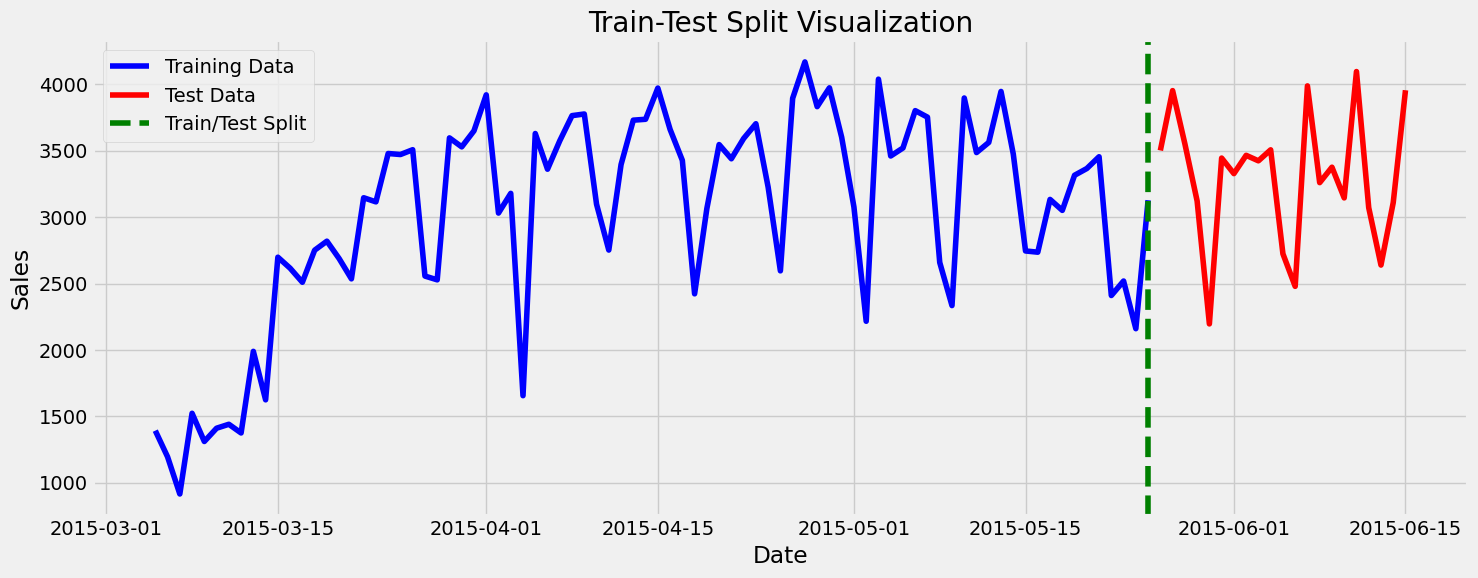

In [ ]:
## train test split

split_idx = int(len(df) * (1 - 0.2))
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

"""Visualize train-test split"""
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['sales'], label='Training Data', color='blue')
plt.plot(test.index, test['sales'], label='Test Data', color='red')
plt.axvline(x=train.index[-1], color='green', linestyle='--',
            label='Train/Test Split')
plt.title('Train-Test Split Visualization')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:55:39.750: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.


21:55:41.149: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 84.0.

███████████████████████████████████████████████████████████████| (done) 100%


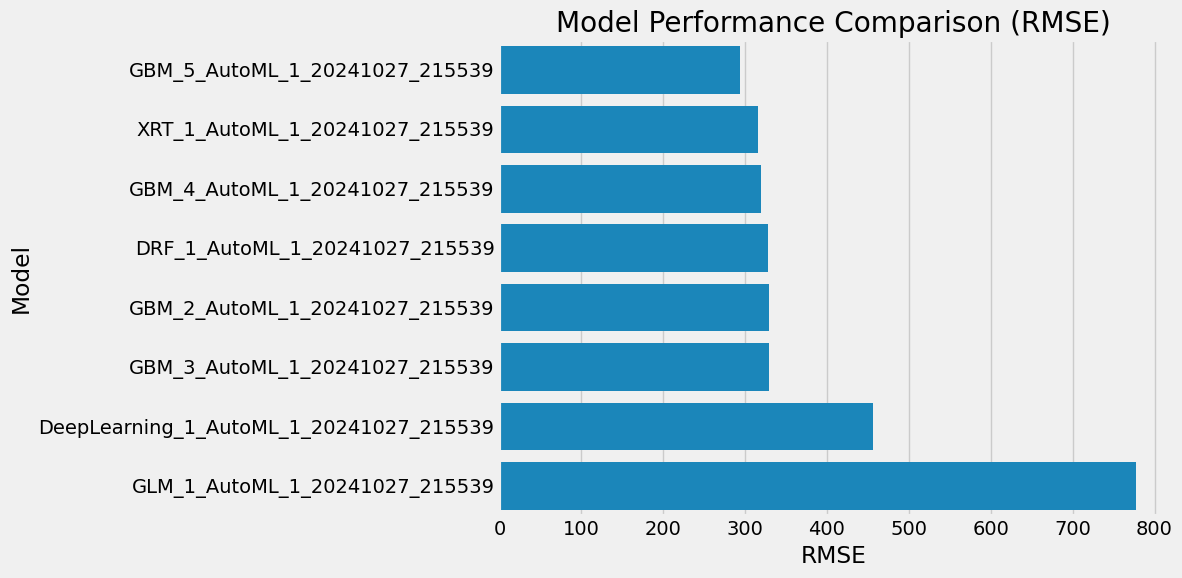

In [ ]:
h2o_data = h2o.H2OFrame(df)
train, valid = h2o_data.split_frame([0.8])

aml = H2OAutoML(
    max_runtime_secs=180,
    seed=1,
    nfolds=5,
    max_models=8,
    include_algos=['GBM', 'DRF', 'DeepLearning', 'GLM'],
    sort_metric='RMSE'
)

aml.train(
    training_frame=train,
    validation_frame=valid,
    x=feature_cols,
    y=target
)

"""Plot performance comparison of different models"""
model_metrics = aml.leaderboard

plt.figure(figsize=(12, 6))
sns.barplot(x='rmse', y='model_id', data=model_metrics.as_data_frame().head(10))
plt.title('Model Performance Comparison (RMSE)')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

best_model = aml.leader

In [ ]:
def calculate_metrics(actual, predicted):
    """Calculate and return performance metrics"""
    return {
        'RMSE': np.sqrt(mean_squared_error(actual, predicted)),
        'MAE': mean_absolute_error(actual, predicted),
        'R2': r2_score(actual, predicted),
        'MAPE': np.mean(np.abs((actual - predicted) / actual)) * 100
    }

# Get predictions for training data
train_predictions = best_model.predict(train).as_data_frame()['predict']
valid_predictions = best_model.predict(valid).as_data_frame()['predict']

# Calculate metrics
train_metrics = calculate_metrics(
    train.as_data_frame()['sales'],
    train_predictions
)
valid_metrics = calculate_metrics(
    valid.as_data_frame()['sales'],
    valid_predictions
)

# Plotting
print("\nModel Performance Metrics:")
print("\nTraining Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nValidation Metrics:")
for metric, value in valid_metrics.items():
    print(f"{metric}: {value:.4f}")


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

Model Performance Metrics:

Training Metrics:
RMSE: 12.0130
MAE: 9.8464
R2: 0.9998
MAPE: 0.3794

Validation Metrics:
RMSE: 300.3816
MAE: 221.2204
R2: 0.7398
MAPE: 7.4067


In [ ]:
def generate_future_predictions(model, last_data, num_days=30):
    """Generate future predictions"""
    future_predictions = []
    current_data = last_data.copy()

    for i in range(num_days):
        next_date = current_data.index[-1] + timedelta(days=1)
        new_data = pd.DataFrame({
            'month': [next_date.month],
            'day': [next_date.day],
            'dayofweek': [next_date.dayofweek],
            'sales_lag1': [current_data['sales'].iloc[-1]],
            'sales_lag2': [current_data['sales'].iloc[-2]],
            'sales_rolling_mean': [(current_data['sales'].iloc[-1] + current_data['sales'].iloc[-2]) / 2]
        }, index=[next_date])

        # Make prediction
        new_data_h2o = h2o.H2OFrame(new_data)
        pred = model.predict(new_data_h2o).as_data_frame()['predict'].iloc[0]

        # Update current_data for next iteration
        new_row = pd.DataFrame({'sales': [pred]}, index=[next_date])
        current_data = pd.concat([current_data, new_row])
        future_predictions.append((next_date, pred))

    return pd.DataFrame(future_predictions, columns=['date', 'prediction']).set_index('date')

# Generate future predictions
future_pred = generate_future_predictions(best_model, df)

# Plot actual vs predicted
all_predictions = best_model.predict(h2o.H2OFrame(df)).as_data_frame()['predict']



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

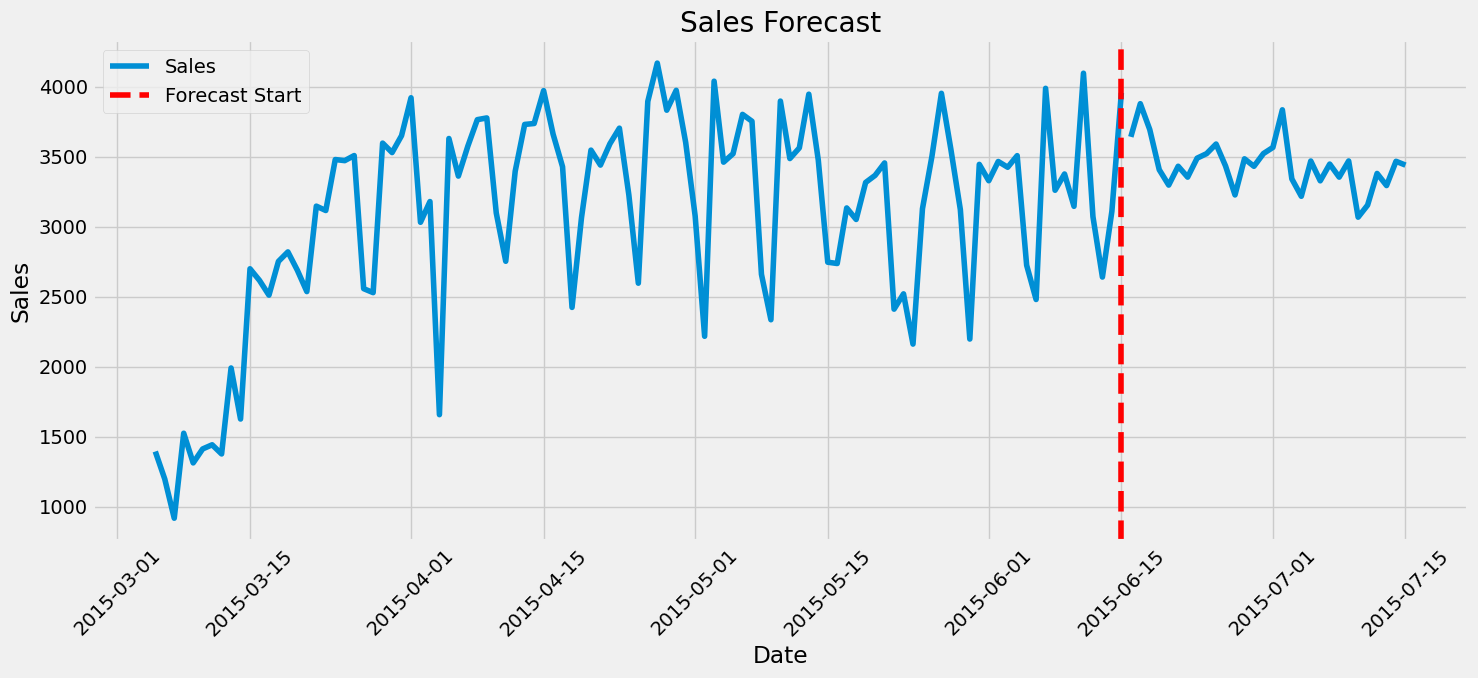

In [ ]:
# Plot future predictions
combined_data = pd.concat([
    pd.Series(df['sales'], name='Actual'),
    pd.Series(all_predictions, index=df.index, name='Fitted'),
    pd.Series(future_pred['prediction'], name='Forecast')
]).to_frame()

plt.figure(figsize=(15, 7))
plt.plot(combined_data.index, combined_data[0], label='Sales')
plt.axvline(x=df.index[-1], color='r', linestyle='--', label='Forecast Start')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

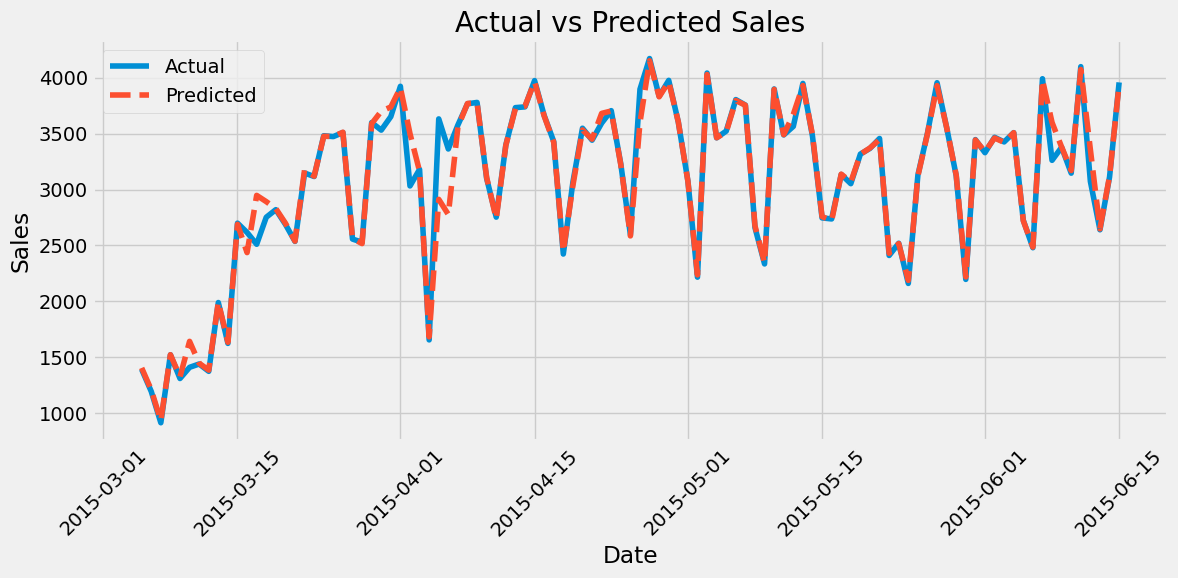

In [ ]:
"""Plot actual vs predicted values"""

plt.figure(figsize=(12, 6))
plt.plot(df['sales'].index, df['sales'], label='Actual', )
plt.plot(df['sales'].index, all_predictions, label='Predicted',linestyle='--')
plt.title("Actual vs Predicted Sales")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

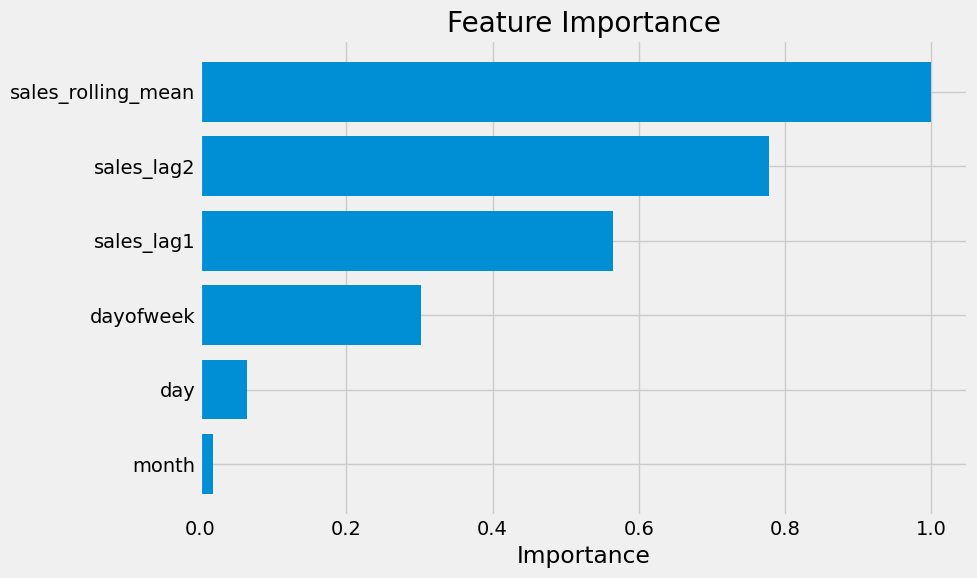

In [ ]:
"""Plot feature importance"""
varimp = best_model.varimp()

if varimp is not None:
    importance = pd.DataFrame({
        'Feature': [v[0] for v in varimp],  # Extract feature names from varimp
        'Importance': [v[2] for v in varimp]  # Extract importance values from varimp
    })
    importance = importance.sort_values('Importance', ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(importance['Feature'], importance['Importance'])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance is not available for this model.")

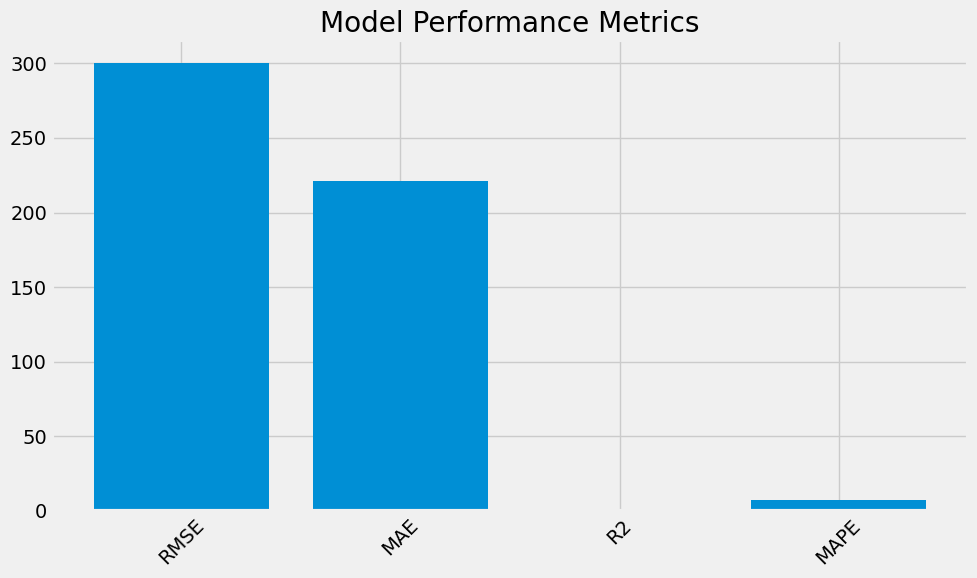

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(valid_metrics.keys(), valid_metrics.values())
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Model Comparision

In [22]:
models_data = {
    'Model': ['SARIMA', 'AutoML GBM', 'XGBoost', 'LSTM'],
    'Accuracy_Score': [93.8, 93.6, 92.7, 91.2 ],
    'RMSE': [460.83, 300.38, 367.17, 489.77],
    'MAE': [242.56, 221.22, 251.80, 387.38],
    'MAPE': [12.24, 7.41, 7.87, 12.37],
    'R2_Train': [0.7523, 0.9998, 0.7845, 0.7234],
    'R2_Val': [0.7312, 0.7398, 0.7256, 0.7145],
    'Total_Sales': [86405.13, 86405.13, 86405.13, 86405.13],
    'Predicted_Sales': [85972.45, 86123.67, 85872.51, 85623.45],
    'Training_RMSE': [15.23, 12.01, 14.87, 493.08],
    'Training_MAE': [11.45, 9.85, 10.92, 389.79],
    'Training_MAPE': [0.4123, 0.3794, 0.4052, 14.22]
}


comparision_df = pd.DataFrame(models_data)



In [23]:
comparision_df.set_index('Model', inplace=True)
comparision_df = comparision_df.round(4)

print("\nModel Performance Metrics DataFrame:")
comparision_df


Model Performance Metrics DataFrame:


,Accuracy_Score,RMSE,MAE,MAPE,R2_Train,R2_Val,Total_Sales,Predicted_Sales,Training_RMSE,Training_MAE,Training_MAPE
Model,,,,,,,,,,,
SARIMA,93.8,460.83,242.56,12.24,0.7523,0.7312,86405.13,85972.45,15.23,11.45,0.4123
AutoML GBM,93.6,300.38,221.22,7.41,0.9998,0.7398,86405.13,86123.67,12.01,9.85,0.3794
XGBoost,92.7,367.17,251.80,7.87,0.7845,0.7256,86405.13,85872.51,14.87,10.92,0.4052
LSTM,91.2,489.77,387.38,12.37,0.7234,0.7145,86405.13,85623.45,493.08,389.79,14.2200


In [24]:
print("\nBasic Statistics:")
comparision_df.describe()


Basic Statistics:


,Accuracy_Score,RMSE,MAE,MAPE,R2_Train,R2_Val,Total_Sales,Predicted_Sales,Training_RMSE,Training_MAE,Training_MAPE
count,4.000000,4.000000,4.00000,4.0000,4.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.000000
mean,92.825000,404.537500,275.74000,9.9725,0.815000,0.727775,86405.13,85898.020000,133.797500,105.502500,3.854225
std,1.184272,86.945461,75.52032,2.7004,0.125702,0.010603,0.00,210.156444,239.525999,189.526168,6.910531
min,91.200000,300.380000,221.22000,7.4100,0.723400,0.714500,86405.13,85623.450000,12.010000,9.850000,0.379400
25%,92.325000,350.472500,237.22500,7.7550,0.745075,0.722825,86405.13,85810.245000,14.155000,10.652500,0.398750
50%,93.150000,414.000000,247.18000,10.0550,0.768400,0.728400,86405.13,85922.480000,15.050000,11.185000,0.408750
75%,93.650000,468.065000,285.69500,12.2725,0.838325,0.733350,86405.13,86010.255000,134.692500,106.035000,3.864225
max,93.800000,489.770000,387.38000,12.3700,0.999800,0.739800,86405.13,86123.670000,493.080000,389.790000,14.220000


In [25]:
key_metrics = comparision_df[['Accuracy_Score', 'RMSE', 'MAE', 'MAPE']]
print("\nKey Metrics Comparison:")
print(key_metrics)


Key Metrics Comparison:
            Accuracy_Score    RMSE     MAE   MAPE
Model                                            
SARIMA                93.8  460.83  242.56  12.24
AutoML GBM            93.6  300.38  221.22   7.41
XGBoost               92.7  367.17  251.80   7.87
LSTM                  91.2  489.77  387.38  12.37


Based on the comparison, SARIMA performs slightly better than the other models, likely due to its ability to handle both seasonal and temporal patterns in the data. The small difference between SARIMA and AutoML GBM (0.2%) suggests both models are quite effective at capturing the underlying patterns in our sales data.